# Feature Engineering

In [479]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
sns.set() # Setting seaborn as default style even if use only matplotlib
pd.set_option('display.max_rows', None)

In [551]:
def target_rel(df, feature, feature_title):
    
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Arrival Delay by {feature_title}')

    sns.barplot(ax=axes[0], data=df, x=feature, y='arr_delay')
    sns.stripplot(ax=axes[1], data=df,x=feature, y='arr_delay')
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)

In [482]:
# get the cleaned dataset

import pickle

with open(r'data\flight_data.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [484]:
# get the test features that any engineered features must be linked to

df_test_features = pd.read_csv(r'csvs\test_features.csv', sep=',')

In [485]:
test_feat = list(df_test_features.columns)

In [486]:
# select only the test features and the target from the training dataset

df_flights = pd.concat([df_flights[test_feat], df_flights['arr_delay']],axis=1)

In [487]:
# use this to get year / month / day from fl_date on test set

df_test_features['fl_date_new'] = pd.to_datetime(df_test_features['fl_date'], unit='ms')
df_test_features['year'] = df_test_features['fl_date_new'].dt.year
df_test_features['month'] = df_test_features['fl_date_new'].dt.month
df_test_features['day'] = df_test_features['fl_date_new'].dt.day
df_test_features.tail()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,fl_date_new,year,month,day
5,1577865600000,WN,WN,WN,5684,WN,N7856A,5684,13891,ONT,...,600,715,N,75,1,333,2020-01-01 08:00:00,2020,1,1
6,1577865600000,WN,WN,WN,6152,WN,N7735A,6152,13891,ONT,...,1620,1740,N,80,1,333,2020-01-01 08:00:00,2020,1,1
7,1577865600000,WN,WN,WN,1679,WN,N405WN,1679,13891,ONT,...,1505,1630,N,85,1,390,2020-01-01 08:00:00,2020,1,1
8,1577865600000,WN,WN,WN,3479,WN,N489WN,3479,13891,ONT,...,1230,1355,N,85,1,390,2020-01-01 08:00:00,2020,1,1
9,1577865600000,WN,WN,WN,4069,WN,N7708E,4069,13891,ONT,...,740,900,N,80,1,390,2020-01-01 08:00:00,2020,1,1


# Round 1

### Mean/Median Monthly Arrival Delay and Arr_Delay

In [488]:
df_flights['fl_date'] = pd.to_datetime(df_flights['fl_date'])
df_flights['year'] = df_flights['fl_date'].dt.year
df_flights['month'] = df_flights['fl_date'].dt.month
df_flights['day'] = df_flights['fl_date'].dt.day

In [528]:
## look at correlation between month and arr_delay

mean_arr_delay = df_flights.groupby('month', as_index=False).agg(mean_arr_delay = ('arr_delay','mean')).sort_values(by='mean_arr_delay', ascending=False)
mean_arr_delay.set_index('month',inplace=True)
mean_arr_delay = mean_arr_delay.T
mean_arr_delay

month,8,6,7,5,2,12,4,3,10,1,11,9
mean_arr_delay,10.135397,10.120094,8.901098,6.805443,6.587885,6.06855,5.382526,2.893273,2.466155,2.297154,2.229622,0.508462


In [520]:
month_dict = mean_arr_delay.to_dict('records')

In [521]:
month_dict

[{8: 10.1,
  6: 10.1,
  7: 8.9,
  5: 6.8,
  2: 6.6,
  12: 6.1,
  4: 5.4,
  3: 2.9,
  10: 2.5,
  1: 2.3,
  11: 2.2,
  9: 0.5}]

In [522]:
df_flights['mean_arr_delay'] = df_flights['month'].map(month_dict[0])

In [523]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,year,month,day,mean_arr_delay
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,2350,N,140,1,986,19.0,2018,1,1,2.3
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,155,N,150,1,1099,46.0,2018,1,1,2.3
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1120,N,150,1,1099,-9.0,2018,1,1,2.3
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,830,N,55,1,197,-3.0,2018,1,1,2.3
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,1835,N,55,1,197,37.0,2018,1,1,2.3


In [524]:
df_flights['arr_delay'].corr(df_flights['mean_arr_delay'])

0.06586483334860879

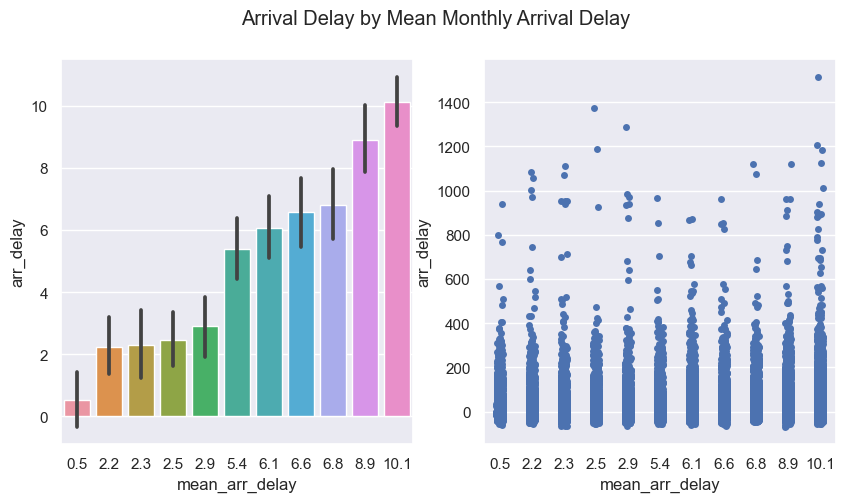

In [527]:
target_rel(df_flights, feature='mean_arr_delay', feature_title='Mean Monthly Arrival Delay')

Text(0.5, 1.0, 'Arrival Delay by Mean Flight Number Delay')

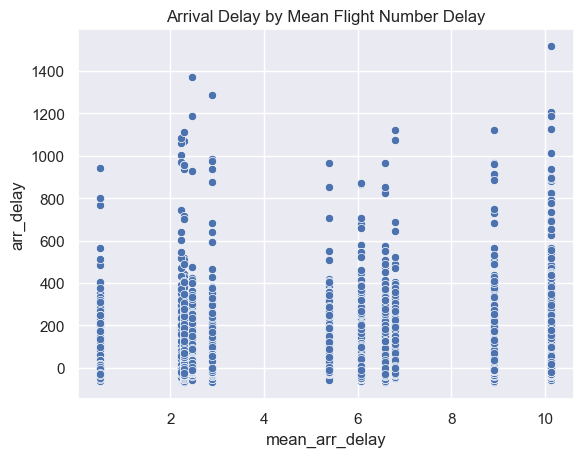

In [497]:
g = sns.scatterplot(data=df_flights, x='mean_arr_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Flight Number Delay')

In [19]:
# get median monthly arrival delay

median_arr_delay = df_flights.groupby('month', as_index=False).agg(median_arr_delay = ('arr_delay','median')).sort_values(by='median_arr_delay', ascending=False)
median_arr_delay.set_index('month',inplace=True)
median_arr_delay = median_arr_delay.T
median_arr_delay

month,5,6,7,8,12,2,4,11,3,10,1,9
median_arr_delay,-5.0,-5.0,-5.0,-5.0,-5.0,-6.0,-6.0,-6.0,-7.0,-7.0,-8.0,-8.0


In [20]:
month_dict = median_arr_delay.to_dict('records')

In [21]:
df_flights['median_arr_delay'] = df_flights['month'].map(month_dict[0])
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dup,crs_elapsed_time,flights,distance,arr_delay,year,month,day,mean_arr_delay,median_arr_delay
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,N,140,1,986,19.0,2018,1,1,2.297154,-8.0
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,N,150,1,1099,46.0,2018,1,1,2.297154,-8.0
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,N,150,1,1099,-9.0,2018,1,1,2.297154,-8.0
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,N,55,1,197,-3.0,2018,1,1,2.297154,-8.0
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,N,55,1,197,37.0,2018,1,1,2.297154,-8.0


In [22]:
df_flights['arr_delay'].corr(df_flights['median_arr_delay'])

0.05691698369021277

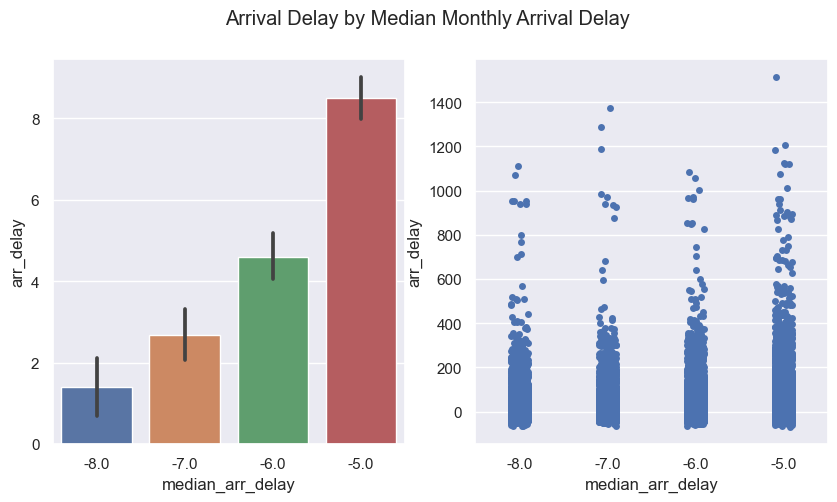

In [23]:
target_rel(df_flights, feature='median_arr_delay', feature_title='Median Monthly Arrival Delay')

### Season and Arr_Delay

In [537]:
## look at relationship between season and arr_delay

season_dict = {
    1:'Winter',
    2:'Winter',
    3:'Spring',
    4:'Spring',
    5:'Spring',
    6:'Summer',
    7:'Summer',
    8:'Summer',
    9:'Fall',
    10:'Fall',
    11:'Fall',
    12:'Winter'}
df_flights["season"] = df_flights["month"].map(season_dict)


In [538]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,flights,distance,arr_delay,year,month,day,mean_arr_delay,day_of_week,season
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,140,1,986,19.0,2018,1,1,2.3,Monday,Winter
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,150,1,1099,46.0,2018,1,1,2.3,Monday,Winter
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,150,1,1099,-9.0,2018,1,1,2.3,Monday,Winter
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,55,1,197,-3.0,2018,1,1,2.3,Monday,Winter
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,55,1,197,37.0,2018,1,1,2.3,Monday,Winter


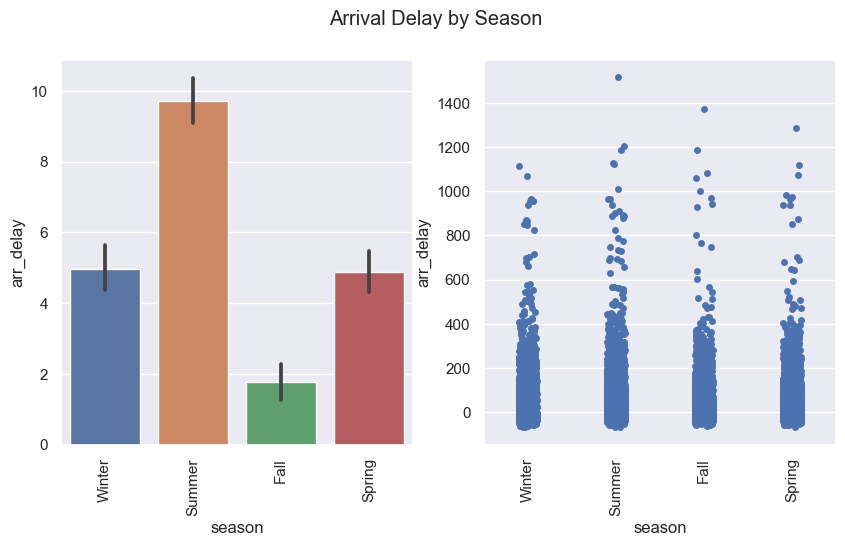

In [539]:
target_rel(df_flights, feature='season', feature_title='Season')

### Day of Week and Arr_Delay

In [27]:
# see if there's a relationship between day of week and arr_delay

# df_flights['fl_date'] = pd.to_datetime(df_flights['fl_date'])

In [540]:
df_flights['day_of_week'] = df_flights['fl_date'].dt.day_name()

In [541]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,flights,distance,arr_delay,year,month,day,mean_arr_delay,day_of_week,season
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,140,1,986,19.0,2018,1,1,2.3,Monday,Winter
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,150,1,1099,46.0,2018,1,1,2.3,Monday,Winter
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,150,1,1099,-9.0,2018,1,1,2.3,Monday,Winter
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,55,1,197,-3.0,2018,1,1,2.3,Monday,Winter
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,55,1,197,37.0,2018,1,1,2.3,Monday,Winter


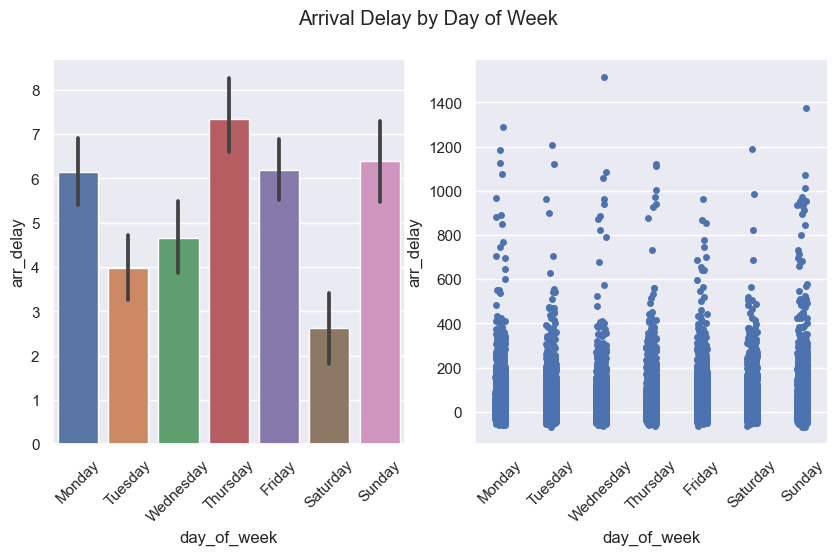

In [552]:
target_rel(df_flights, feature='day_of_week', feature_title='Day of Week')

### Weekday/Weekend and Arr_Delay

In [31]:
df_flights["is_weekend"] = df_flights['fl_date'].dt.dayofweek > 4

In [32]:
df_flights[['day_of_week','is_weekend']].groupby(['day_of_week','is_weekend']).count()

,
day_of_week,is_weekend
Friday,False
Monday,False
Saturday,True
Sunday,True
Thursday,False
Tuesday,False
Wednesday,False


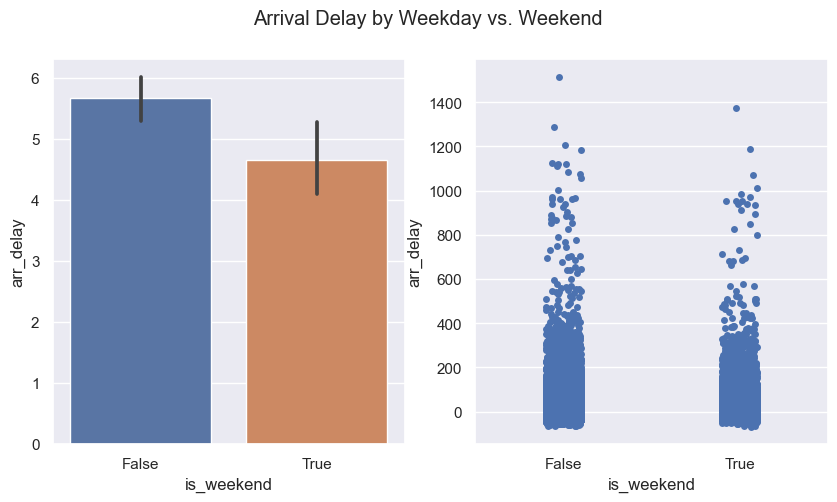

In [33]:
target_rel(df_flights, feature='is_weekend', feature_title='Weekday vs. Weekend')

### Holidays and Arr_Delay

In [34]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2018-01-01', end='2019-12-31')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df_flights['is_holiday'] = df_flights['fl_date'].isin(holidays)
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_delay,year,month,day,mean_arr_delay,median_arr_delay,season,day_of_week,is_weekend,is_holiday
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,19.0,2018,1,1,2.297154,-8.0,Winter,Monday,False,True
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,46.0,2018,1,1,2.297154,-8.0,Winter,Monday,False,True
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,-9.0,2018,1,1,2.297154,-8.0,Winter,Monday,False,True
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,-3.0,2018,1,1,2.297154,-8.0,Winter,Monday,False,True
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,37.0,2018,1,1,2.297154,-8.0,Winter,Monday,False,True


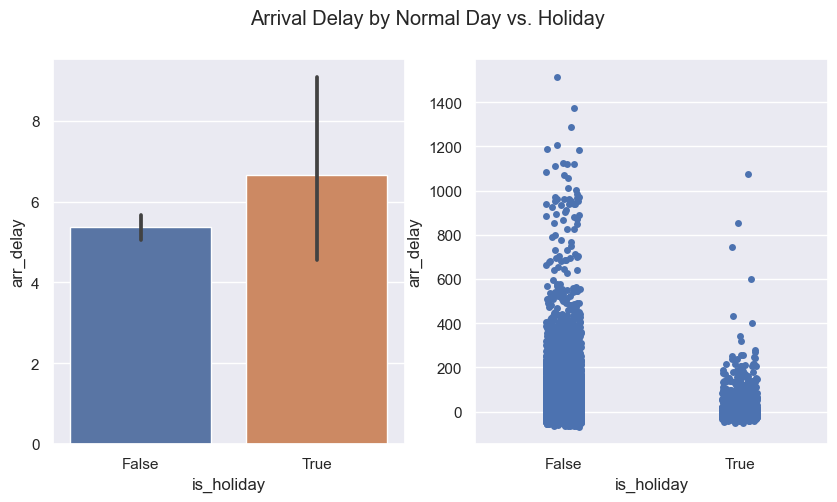

In [35]:
target_rel(df_flights, feature='is_holiday', feature_title='Normal Day vs. Holiday')

### Departure Time of Day and Arr_Delay

In [544]:
# look at relationship between departure time of day and arr_delay

df_flights['crs_dep_time'] = df_flights['crs_dep_time'].astype(int)

In [545]:
df_flights['crs_dep_time'] = pd.to_datetime(df_flights['crs_dep_time'], format = '%H%M', errors = 'coerce')
df_flights['crs_dep_time_hour'] = df_flights['crs_dep_time'].dt.hour

In [546]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [1, 5, 10, 15, 20, 24]
df_flights['crs_dep_time_of_day'] = pd.cut(df_flights['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [547]:
df_flights.head(20)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,arr_delay,year,month,day,mean_arr_delay,day_of_week,season,crs_dep_time_hour,crs_dep_time_of_day
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,19.0,2018,1,1,2.3,Monday,Winter,19.0,late afternoon
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,46.0,2018,1,1,2.3,Monday,Winter,21.0,evening
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,-9.0,2018,1,1,2.3,Monday,Winter,6.0,late morning
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,-3.0,2018,1,1,2.3,Monday,Winter,7.0,late morning
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,2018,1,1,2.3,Monday,Winter,17.0,late afternoon
5,2018-01-01,WN,WN,WN,1683,WN,N221WN,1683,12889,LAS,...,197,15.0,2018,1,1,2.3,Monday,Winter,21.0,evening
6,2018-01-01,WN,WN,WN,6083,WN,N7857B,6083,12889,LAS,...,197,29.0,2018,1,1,2.3,Monday,Winter,13.0,midday
7,2018-01-01,WN,WN,WN,495,WN,N7720F,495,12889,LAS,...,763,5.0,2018,1,1,2.3,Monday,Winter,11.0,midday
8,2018-01-01,WN,WN,WN,5488,WN,N777QC,5488,12889,LAS,...,763,3.0,2018,1,1,2.3,Monday,Winter,21.0,evening
9,2018-01-01,WN,WN,WN,6078,WN,N489WN,6078,12889,LAS,...,763,71.0,2018,1,1,2.3,Monday,Winter,19.0,late afternoon


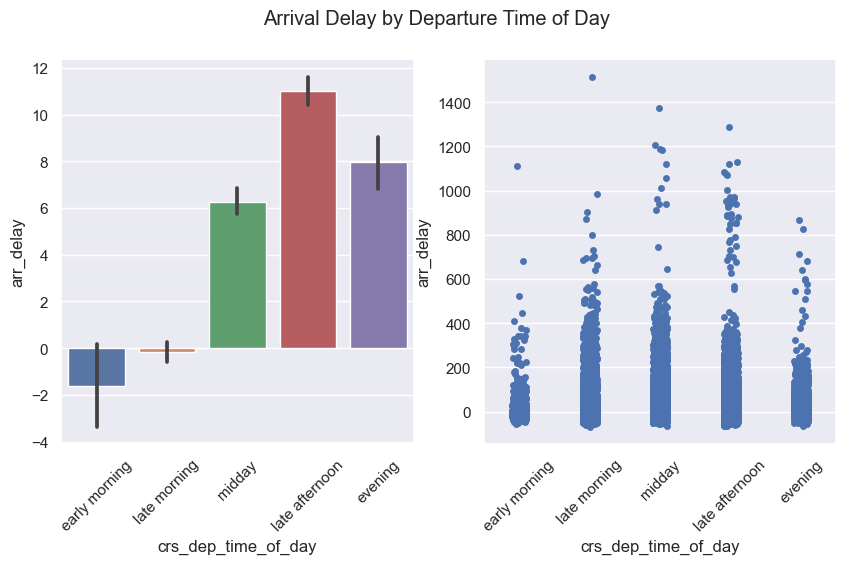

In [553]:
target_rel(df_flights, feature='crs_dep_time_of_day', feature_title='Departure Time of Day')

In [41]:
df_flights.loc[df_flights['crs_dep_time'].isna(), ['crs_dep_time']]

,crs_dep_time
9472,NaT
17287,NaT
22730,NaT
25155,NaT
26211,NaT
26772,NaT
39621,NaT
45944,NaT
46870,NaT
49001,NaT


In [549]:
df_flights.dropna(inplace=True)

In [550]:
df_flights.loc[df_flights['crs_dep_time'].isna(), ['crs_dep_time']]

,crs_dep_time


### Arrival Time of Day and Arr_Delay

In [554]:
# look at relationship between arrival time of day and arr_delay

df_flights['crs_arr_time'] = df_flights['crs_arr_time'].astype(int)

In [555]:
df_flights['crs_arr_time'] = pd.to_datetime(df_flights['crs_arr_time'], format = '%H%M', errors = 'coerce')
df_flights['crs_arr_time_hour'] = df_flights['crs_arr_time'].dt.hour

In [556]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [1, 5, 10, 15, 20, 24]
df_flights['crs_arr_time_of_day'] = pd.cut(df_flights['crs_arr_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [557]:
df_flights.head(20)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,year,month,day,mean_arr_delay,day_of_week,season,crs_dep_time_hour,crs_dep_time_of_day,crs_arr_time_hour,crs_arr_time_of_day
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,2018,1,1,2.3,Monday,Winter,19.0,late afternoon,23.0,evening
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,2018,1,1,2.3,Monday,Winter,21.0,evening,15.0,midday
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,2018,1,1,2.3,Monday,Winter,6.0,late morning,11.0,midday
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,2018,1,1,2.3,Monday,Winter,7.0,late morning,8.0,late morning
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,2018,1,1,2.3,Monday,Winter,17.0,late afternoon,18.0,late afternoon
5,2018-01-01,WN,WN,WN,1683,WN,N221WN,1683,12889,LAS,...,2018,1,1,2.3,Monday,Winter,21.0,evening,22.0,evening
6,2018-01-01,WN,WN,WN,6083,WN,N7857B,6083,12889,LAS,...,2018,1,1,2.3,Monday,Winter,13.0,midday,14.0,midday
7,2018-01-01,WN,WN,WN,495,WN,N7720F,495,12889,LAS,...,2018,1,1,2.3,Monday,Winter,11.0,midday,14.0,midday
8,2018-01-01,WN,WN,WN,5488,WN,N777QC,5488,12889,LAS,...,2018,1,1,2.3,Monday,Winter,21.0,evening,1.0,NaN
9,2018-01-01,WN,WN,WN,6078,WN,N489WN,6078,12889,LAS,...,2018,1,1,2.3,Monday,Winter,19.0,late afternoon,22.0,evening


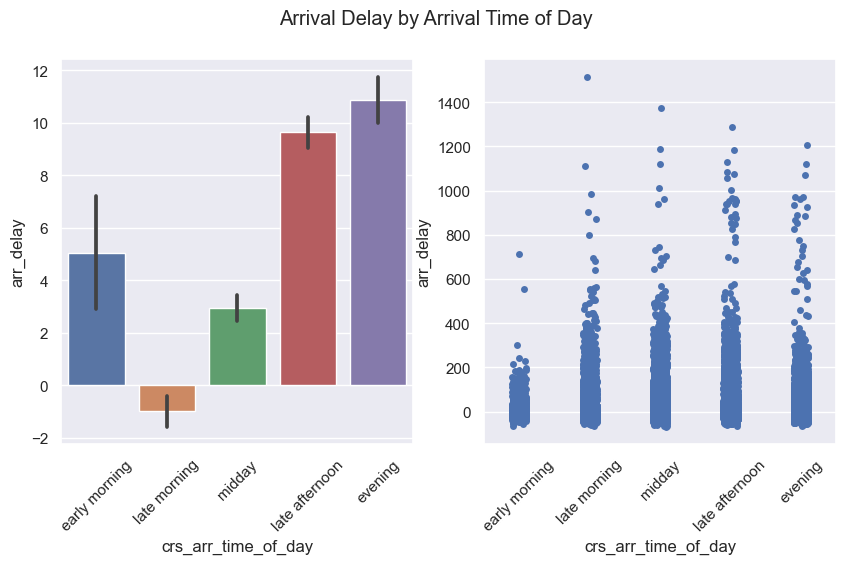

In [558]:
target_rel(df_flights, feature='crs_arr_time_of_day', feature_title='Arrival Time of Day')

In [49]:
len(df_flights.loc[df_flights['crs_arr_time'].isna(), ['crs_arr_time']])

264

In [50]:
df_flights.dropna(inplace=True)

In [51]:
df_flights.loc[df_flights['crs_arr_time'].isna(), ['crs_arr_time']]

,crs_arr_time


### Region and Arr_Delay

In [52]:
# look at relationship between region and arr_delay

In [53]:
new_origin = df_flights['origin_city_name'].str.split(",", n = 1, expand = True)
new_origin.head()

,0,1
0,Las Vegas,NV
1,Las Vegas,NV
2,Las Vegas,NV
3,Las Vegas,NV
4,Las Vegas,NV


In [54]:
new_dest = df_flights['dest_city_name'].str.split(",", n = 1, expand = True)
new_dest.head()

,0,1
0,Oklahoma City,OK
1,Omaha,NE
2,Omaha,NE
3,Ontario,CA
4,Ontario,CA


In [55]:
df_flights['origin_state'] = new_origin[1].str.strip()
df_flights['dest_state'] = new_dest[1].str.strip()
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,season,day_of_week,is_weekend,is_holiday,crs_dep_time_hour,crs_dep_time_of_day,crs_arr_time_hour,crs_arr_time_of_day,origin_state,dest_state
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,Winter,Monday,False,True,19.0,late afternoon,23.0,evening,NV,OK
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,Winter,Monday,False,True,21.0,evening,15.0,midday,NV,NE
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,Winter,Monday,False,True,6.0,late morning,11.0,midday,NV,NE
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,Winter,Monday,False,True,7.0,late morning,8.0,late morning,NV,CA
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,Winter,Monday,False,True,17.0,late afternoon,18.0,late afternoon,NV,CA


In [56]:
# Add a region feature that groups states into four regions
# Region Dictionary for States *includes DC and Puerto Rico

state_region = {
    'WA': 'West',
    'OR': 'West',
    'CA': 'West',
    'AK': 'West',
    'HI': 'West',
    'ID': 'West',
    'MT': 'West',
    'WY': 'West',
    'NV': 'West',
    'UT': 'West',
    'CO': 'West',
    'AZ': 'West',
    'NM': 'West',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'MN': 'Midwest',
    'NE': 'Midwest',
    'KS': 'Midwest',
    'IA': 'Midwest',
    'MO': 'Midwest',
    'WI': 'Midwest',
    'IL': 'Midwest',
    'MI': 'Midwest',
    'IN': 'Midwest',
    'OH': 'Midwest',
    'VT': 'Northeast',
    'ME': 'Northeast',
    'NH': 'Northeast',
    'MA': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'CT': 'Northeast',
    'NJ': 'Northeast',
    'DE': 'South',
    'MD': 'South',
    'WV': 'South',
    'DC': 'South',
    'VA': 'South',
    'KY': 'South',
    'NC': 'South',
    'OK': 'South',
    'TX': 'South',
    'AR': 'South',
    'LA': 'South',
    'MS': 'South',
    'AL': 'South',
    'TN': 'South',
    'SC': 'South',
    'GA': 'South',
    'FL': 'South',
    'PR': 'Other',
    'VI': 'Other',
    'TT': 'Other'
}
len(state_region)

54

In [57]:
df_flights["origin_region"] = df_flights["origin_state"].map(state_region)

In [58]:
df_flights["dest_region"] = df_flights["dest_state"].map(state_region)

In [59]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,is_weekend,is_holiday,crs_dep_time_hour,crs_dep_time_of_day,crs_arr_time_hour,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,False,True,19.0,late afternoon,23.0,evening,NV,OK,West,South
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,False,True,21.0,evening,15.0,midday,NV,NE,West,Midwest
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,False,True,6.0,late morning,11.0,midday,NV,NE,West,Midwest
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,False,True,7.0,late morning,8.0,late morning,NV,CA,West,West
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,False,True,17.0,late afternoon,18.0,late afternoon,NV,CA,West,West


In [60]:
df_flights['origin_region'].value_counts()

South        38075
West         28059
Midwest      18528
Northeast    13162
Other          539
Name: origin_region, dtype: int64

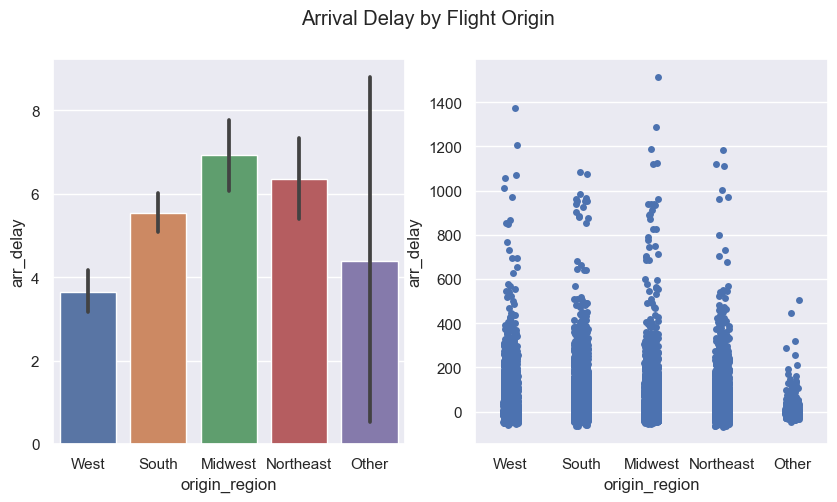

In [61]:
target_rel(df_flights, feature='origin_region', feature_title='Flight Origin')

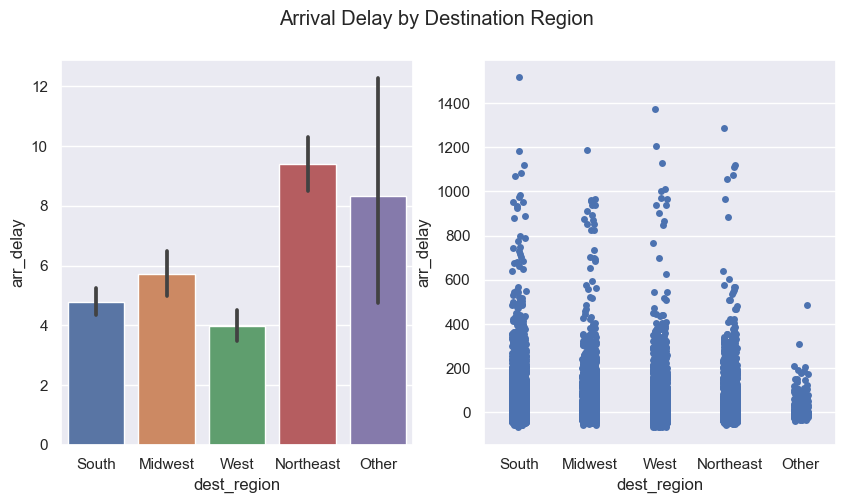

In [62]:
target_rel(df_flights, feature='dest_region', feature_title='Destination Region')

### Flight Type and Arr_Delay

In [63]:
# look at relationship between flight type and arr_delay

df_flights['haul'] = pd.cut(df_flights['distance'], bins = [0,800,2200,5000],labels=['short','medium','long'])
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,is_holiday,crs_dep_time_hour,crs_dep_time_of_day,crs_arr_time_hour,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,haul
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,True,19.0,late afternoon,23.0,evening,NV,OK,West,South,medium
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,True,21.0,evening,15.0,midday,NV,NE,West,Midwest,medium
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,True,6.0,late morning,11.0,midday,NV,NE,West,Midwest,medium
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,True,7.0,late morning,8.0,late morning,NV,CA,West,West,short
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,True,17.0,late afternoon,18.0,late afternoon,NV,CA,West,West,short


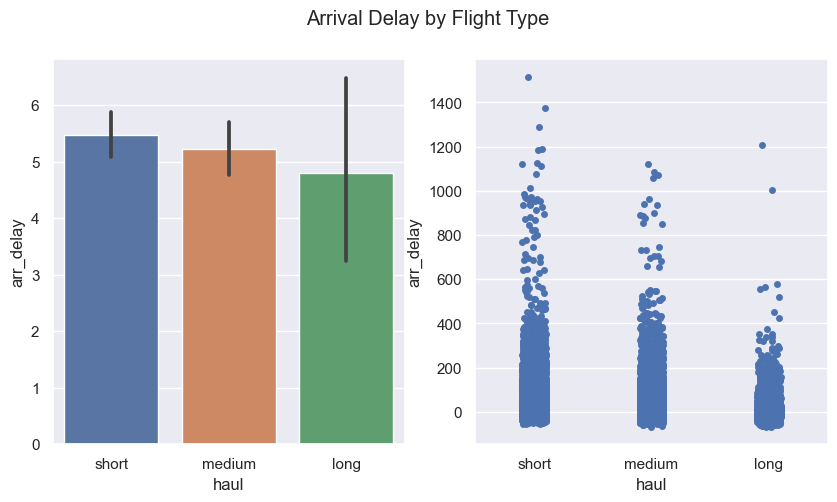

In [64]:
target_rel(df_flights, feature='haul', feature_title='Flight Type')

In [65]:
# drop unneeded features

# df_flights = df_flights.drop(columns=['fl_date','dup','flights','mkt_carrier','mkt_carrier_fl_num','tail_num','op_carrier_fl_num','origin_airport_id','origin','origin_city_name','dest_airport_id','dest','dest_city_name','crs_dep_time','crs_arr_time'])

In [66]:
# make a pickle of the feature engineered data
import pickle

#Do Some Feature Engineering
feature_engineered_data = df_flights

#Dump it(save it in binary format)
with open(r'..\data\flight_data_engineered.pickle','wb') as flight_data_file:
     pickle.dump(feature_engineered_data, flight_data_file)

# Round 2

### Origin Airport Mean/Median Arrival Delay and Arr_Delay

In [67]:
# get the cleaned dataset

import pickle

with open(r'..\data\flight_data_engineered.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [68]:
filter_df = df_flights[['origin_airport_id','arr_delay','origin_city_name']]
mean_airport_delay = filter_df.groupby('origin_airport_id', as_index=False).agg(mean_airport_delay = ('arr_delay','mean')).sort_values(by='mean_airport_delay', ascending=False)
mean_airport_delay.set_index('origin_airport_id',inplace=True)
mean_airport_delay = mean_airport_delay.T
mean_airport_delay.head()

origin_airport_id,11447,13832,15454,11980,10361,10967,10728,13034,11027,11587,...,12129,10558,10631,10643,10141,15074,10739,12335,15841,10409
mean_airport_delay,135.222222,124.833333,105.166667,79.888889,70.666667,60.777778,53.666667,41.857143,40.125,37.555556,...,-13.5,-13.666667,-13.714286,-14.0,-15.25,-15.363636,-16.857143,-20.8,-22.0,-24.0


In [69]:
airport_dict = mean_airport_delay.to_dict('records')

In [70]:
airport_dict

[{11447: 135.22222222222223,
  13832: 124.83333333333333,
  15454: 105.16666666666667,
  11980: 79.88888888888889,
  10361: 70.66666666666667,
  10967: 60.77777777777778,
  10728: 53.666666666666664,
  13034: 41.857142857142854,
  11027: 40.125,
  11587: 37.55555555555556,
  15582: 36.55555555555556,
  11122: 32.166666666666664,
  13964: 31.75,
  15070: 30.97142857142857,
  10685: 29.86842105263158,
  13829: 29.666666666666668,
  14321: 28.239520958083833,
  13459: 23.7,
  13121: 22.333333333333332,
  12884: 21.846153846153847,
  10747: 21.576923076923077,
  10154: 21.5,
  11865: 21.142857142857142,
  15008: 21.0,
  12544: 20.96153846153846,
  14633: 20.714285714285715,
  11470: 20.65,
  12519: 20.307692307692307,
  11092: 20.285714285714285,
  14696: 18.853932584269664,
  11503: 18.83783783783784,
  16101: 18.636363636363637,
  13933: 18.526315789473685,
  14716: 17.705882352941178,
  11637: 17.263736263736263,
  11111: 16.102564102564102,
  11076: 16.0,
  11013: 16.0,
  11778: 15.95,

In [71]:
df_flights['mean_origin_airport_delay'] = df_flights['origin_airport_id'].map(airport_dict[0])

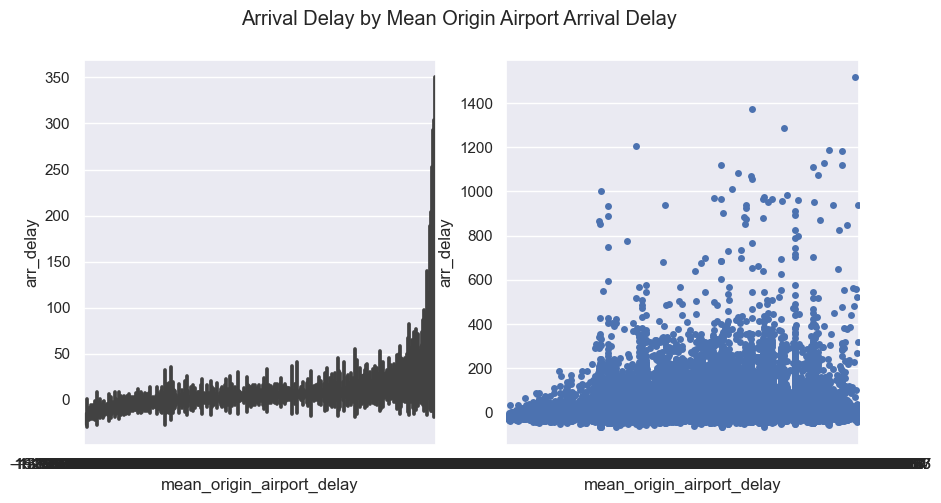

In [72]:
target_rel(df_flights, feature='mean_origin_airport_delay', feature_title='Mean Origin Airport Arrival Delay')

,arr_delay,mean_origin_airport_delay
0,2.944439,1.724949
1,3.828641,1.724949
4,3.610918,1.724949
5,2.708050,1.724949
6,3.367296,1.724949


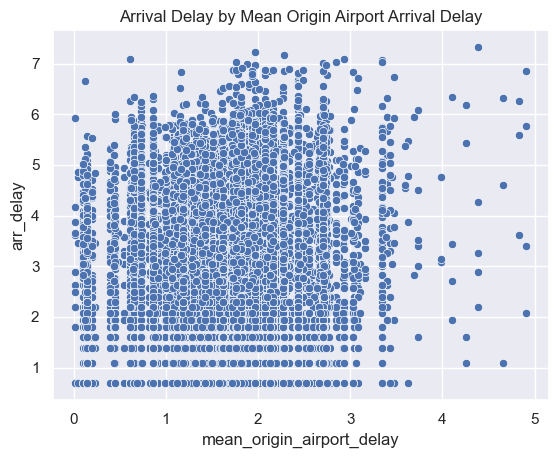

In [96]:
to_plot = df_flights[(df_flights['arr_delay']>1)&(df_flights['mean_origin_airport_delay']>1)]
to_plot = np.log(to_plot[['arr_delay','mean_origin_airport_delay']])

g = sns.scatterplot(data=to_plot, x='mean_origin_airport_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Origin Airport Arrival Delay')
to_plot.head()

In [97]:
df_flights['arr_delay'].corr(df_flights['mean_origin_airport_delay'])

0.10079671185315345

In [74]:
cut_labels = ['fast','medium-fast','medium-slow','slow']
df_flights['origin_airport_mean_speed'] = pd.qcut(df_flights['mean_origin_airport_delay'], 4, labels=cut_labels)

In [75]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time_of_day,crs_arr_time_hour,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,haul,mean_origin_airport_delay,origin_airport_mean_speed
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,late afternoon,23.0,evening,NV,OK,West,South,medium,5.612236,medium-fast
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,evening,15.0,midday,NV,NE,West,Midwest,medium,5.612236,medium-fast
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,late morning,11.0,midday,NV,NE,West,Midwest,medium,5.612236,medium-fast
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,late morning,8.0,late morning,NV,CA,West,West,short,5.612236,medium-fast
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,late afternoon,18.0,late afternoon,NV,CA,West,West,short,5.612236,medium-fast


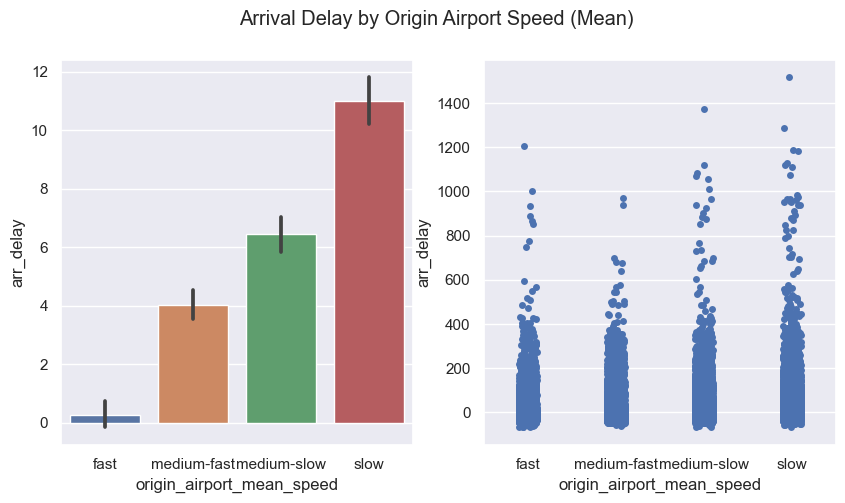

In [76]:
target_rel(df_flights, feature='origin_airport_mean_speed', feature_title='Origin Airport Speed (Mean)')

In [77]:
filter_df = df_flights[['origin_airport_id','arr_delay','origin_city_name']]
median_airport_delay = filter_df.groupby('origin_airport_id', as_index=False).agg(median_airport_delay = ('arr_delay','median')).sort_values(by='median_airport_delay', ascending=False)
median_airport_delay.set_index('origin_airport_id',inplace=True)
median_airport_delay = median_airport_delay.T
median_airport_delay.head()

origin_airport_id,13829,10728,13832,14237,14905,15008,12250,11470,11699,13459,...,15074,11076,11577,11905,12335,14520,12365,10739,15841,10409
median_airport_delay,36.0,23.0,13.5,12.0,11.0,11.0,10.0,9.5,8.5,8.0,...,-17.0,-17.0,-17.0,-17.0,-18.0,-19.0,-20.0,-21.0,-22.0,-24.0


In [78]:
airport_dict = median_airport_delay.to_dict('records')

In [79]:
airport_dict

[{13829: 36.0,
  10728: 23.0,
  13832: 13.5,
  14237: 12.0,
  14905: 11.0,
  15008: 11.0,
  12250: 10.0,
  11470: 9.5,
  11699: 8.5,
  13459: 8.0,
  13964: 8.0,
  12265: 7.0,
  14231: 5.0,
  13347: 4.5,
  11867: 4.0,
  13933: 4.0,
  13034: 3.0,
  12902: 3.0,
  10245: 2.0,
  10918: 1.0,
  11067: 1.0,
  11503: 1.0,
  12544: 1.0,
  10676: 0.0,
  10275: 0.0,
  13121: 0.0,
  14716: 0.0,
  16101: 0.0,
  10926: 0.0,
  15454: -0.5,
  10154: -0.5,
  13541: -0.5,
  12511: -1.0,
  14303: -1.0,
  11092: -1.0,
  12255: -1.5,
  12884: -1.5,
  12917: -2.0,
  12899: -2.0,
  10779: -2.0,
  14582: -2.5,
  11618: -3.0,
  14489: -3.0,
  14314: -3.0,
  11445: -3.0,
  11259: -3.0,
  11298: -3.0,
  11274: -3.0,
  13486: -3.0,
  15023: -3.0,
  11778: -3.5,
  14877: -3.5,
  11413: -4.0,
  15024: -4.0,
  12173: -4.0,
  11057: -4.0,
  11648: -4.0,
  15027: -4.0,
  15016: -4.0,
  12177: -4.0,
  11525: -4.0,
  13970: -4.0,
  10821: -4.0,
  13830: -4.0,
  13303: -4.0,
  13232: -4.0,
  13873: -4.0,
  14108: -4.0,
  

In [80]:
df_flights['median_origin_airport_delay'] = df_flights['origin_airport_id'].map(airport_dict[0])

In [86]:
df_flights['median_origin_airport_delay'].describe()

count    98363.000000
mean        -6.251568
std          2.219766
min        -24.000000
25%         -7.500000
50%         -6.000000
75%         -5.000000
max         36.000000
Name: median_origin_airport_delay, dtype: float64

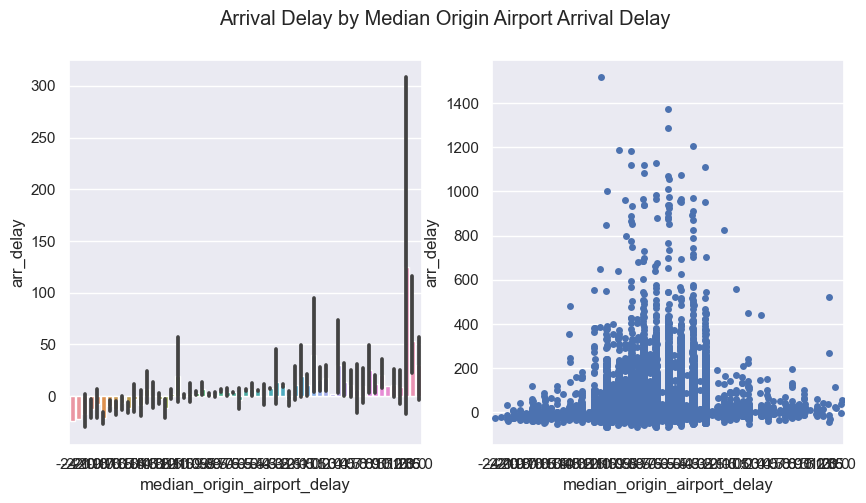

In [81]:
target_rel(df_flights, feature='median_origin_airport_delay', feature_title='Median Origin Airport Arrival Delay')

Text(0.5, 1.0, 'Arrival Delay by Median Origin Airport Arrival Delay')

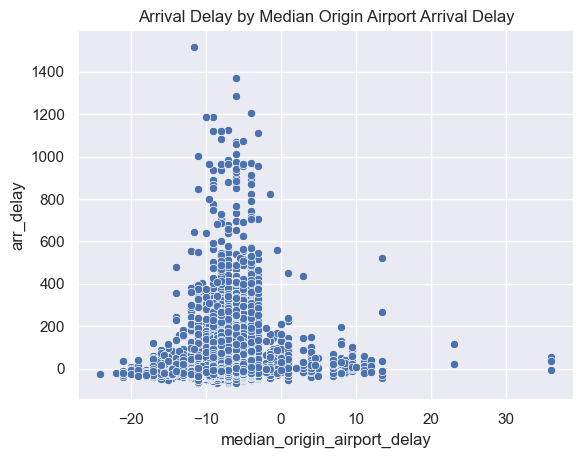

In [82]:
g = sns.scatterplot(data=df_flights, x='median_origin_airport_delay', y='arr_delay')
g.set_title('Arrival Delay by Median Origin Airport Arrival Delay')

In [98]:
df_flights['arr_delay'].corr(df_flights['median_origin_airport_delay'])

0.04733177145733161

In [84]:
cut_labels = ['fast','medium-fast','medium-slow','slow']
df_flights['origin_airport_median_speed'] = pd.qcut(df_flights['median_origin_airport_delay'], 4, labels=cut_labels)

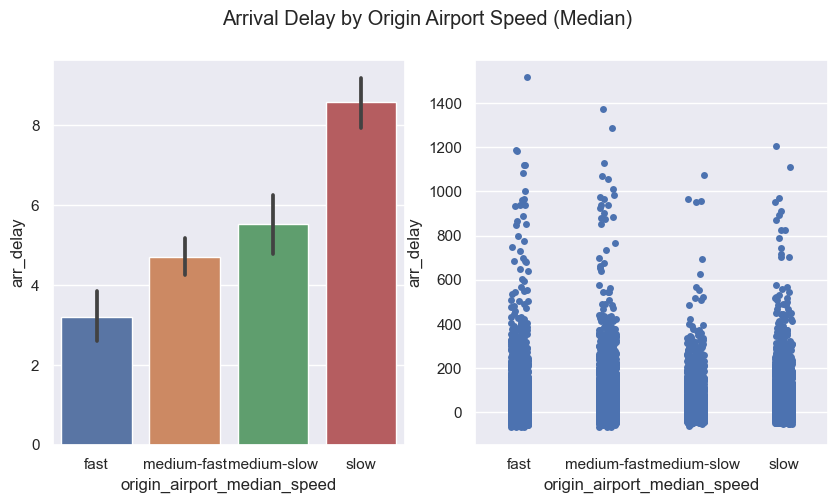

In [85]:
target_rel(df_flights, feature='origin_airport_median_speed', feature_title='Origin Airport Speed (Median)')

In [ ]:
df_flights['median_origin_airport_delay'].describe()

count    98363.000000
mean        -6.251568
std          2.219766
min        -24.000000
25%         -7.500000
50%         -6.000000
75%         -5.000000
max         36.000000
Name: median_origin_airport_delay, dtype: float64

In [87]:
df_flights[['median_origin_airport_delay','origin_airport_median_speed','mean_origin_airport_delay','origin_airport_mean_speed','origin_city_name']].head(50)

,median_origin_airport_delay,origin_airport_median_speed,mean_origin_airport_delay,origin_airport_mean_speed,origin_city_name
0,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"
1,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"
2,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"
3,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"
4,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"
5,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"
6,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"
7,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"
9,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"
10,-4.0,slow,5.612236,medium-fast,"Las Vegas, NV"


In [99]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,haul,mean_origin_airport_delay,origin_airport_mean_speed,median_origin_airport_delay,origin_airport_median_speed
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,evening,NV,OK,West,South,medium,5.612236,medium-fast,-4.0,slow
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,midday,NV,NE,West,Midwest,medium,5.612236,medium-fast,-4.0,slow
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,midday,NV,NE,West,Midwest,medium,5.612236,medium-fast,-4.0,slow
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,late morning,NV,CA,West,West,short,5.612236,medium-fast,-4.0,slow
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,late afternoon,NV,CA,West,West,short,5.612236,medium-fast,-4.0,slow


In [100]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'year', 'month', 'day', 'mean_arr_delay',
       'median_arr_delay', 'season', 'day_of_week', 'is_weekend', 'is_holiday',
       'crs_dep_time_hour', 'crs_dep_time_of_day', 'crs_arr_time_hour',
       'crs_arr_time_of_day', 'origin_state', 'dest_state', 'origin_region',
       'dest_region', 'haul', 'mean_origin_airport_delay',
       'origin_airport_mean_speed', 'median_origin_airport_delay',
       'origin_airport_median_speed'],
      dtype='object')

### Destination Airport Mean Arrival Delay and Arr_Delay

In [101]:
filter_df = df_flights[['dest_airport_id','arr_delay','origin_city_name']]
mean_airport_delay = filter_df.groupby('dest_airport_id', as_index=False).agg(mean_airport_delay = ('arr_delay','mean')).sort_values(by='mean_airport_delay', ascending=False)
mean_airport_delay.set_index('dest_airport_id',inplace=True)
mean_airport_delay = mean_airport_delay.T
mean_airport_delay.head()

dest_airport_id,15454,11027,12119,13964,10361,16101,15582,11823,11587,12223,...,12129,10333,11525,14802,10754,10409,10165,14256,11336,16869
mean_airport_delay,89.5,79.6,53.0,36.5,35.9,34.363636,33.5,33.485981,32.0,31.652174,...,-14.75,-14.777778,-16.666667,-16.875,-18.0,-21.0,-21.0,-22.0,-23.0,-26.5


In [102]:
airport_dict = mean_airport_delay.to_dict('records')

In [103]:
airport_dict

[{15454: 89.5,
  11027: 79.6,
  12119: 53.0,
  13964: 36.5,
  10361: 35.9,
  16101: 34.36363636363637,
  15582: 33.5,
  11823: 33.48598130841121,
  11587: 32.0,
  12223: 31.652173913043477,
  13832: 30.77777777777778,
  11447: 28.77777777777778,
  14254: 28.0,
  13388: 24.6,
  11471: 24.333333333333332,
  15070: 24.044444444444444,
  14952: 24.0,
  12007: 22.894736842105264,
  13367: 22.234567901234566,
  13344: 22.2,
  12250: 22.0,
  15027: 21.0,
  10136: 20.958333333333332,
  12898: 20.714285714285715,
  11618: 19.506721820062047,
  10431: 19.321739130434782,
  11109: 18.94927536231884,
  14524: 18.322683706070286,
  14711: 18.321428571428573,
  11503: 18.294117647058822,
  11445: 18.0,
  13121: 17.875,
  15048: 17.692307692307693,
  11315: 17.0,
  10874: 16.32941176470588,
  14321: 15.883435582822086,
  10967: 15.857142857142858,
  14633: 15.796296296296296,
  14761: 15.721649484536082,
  13459: 15.55,
  12094: 15.529411764705882,
  10620: 15.121621621621621,
  13256: 14.74626865671

In [104]:
df_flights['mean_dest_airport_delay'] = df_flights['dest_airport_id'].map(airport_dict[0])

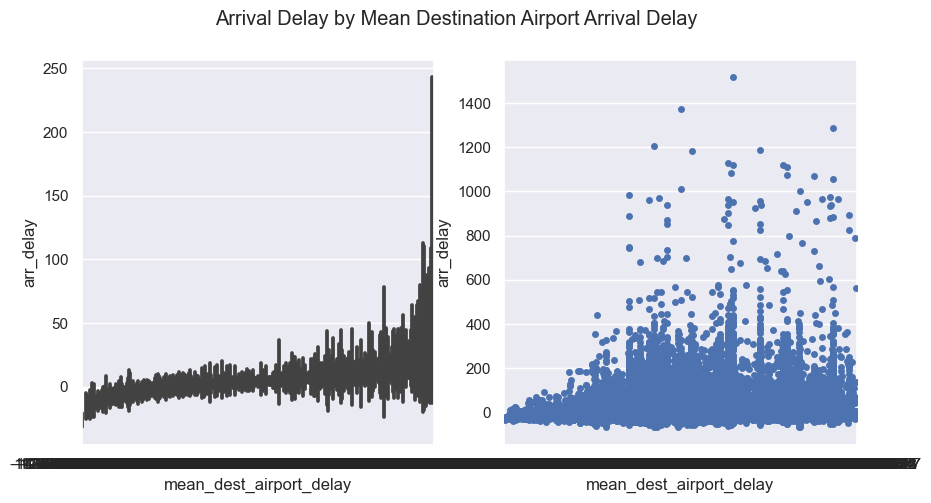

In [105]:
target_rel(df_flights, feature='mean_dest_airport_delay', feature_title='Mean Destination Airport Arrival Delay')

Text(0.5, 1.0, 'Arrival Delay by Mean Destination Airport Arrival Delay')

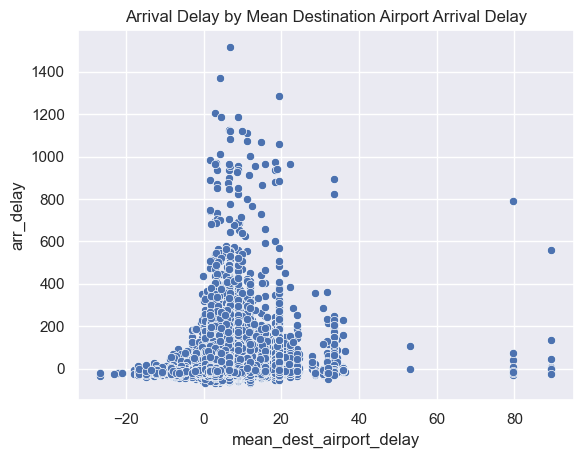

In [106]:
g = sns.scatterplot(data=df_flights, x='mean_dest_airport_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Destination Airport Arrival Delay')

In [107]:
df_flights['arr_delay'].corr(df_flights['mean_dest_airport_delay'])

0.09370001565254643

In [108]:
cut_labels = ['fast','medium-fast','medium-slow','slow']
df_flights['dest_airport_mean_speed'] = pd.qcut(df_flights['mean_dest_airport_delay'], 4, labels=cut_labels)

In [109]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest_state,origin_region,dest_region,haul,mean_origin_airport_delay,origin_airport_mean_speed,median_origin_airport_delay,origin_airport_median_speed,mean_dest_airport_delay,dest_airport_mean_speed
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,OK,West,South,medium,5.612236,medium-fast,-4.0,slow,11.409396,slow
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,NE,West,Midwest,medium,5.612236,medium-fast,-4.0,slow,6.584570,medium-slow
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,NE,West,Midwest,medium,5.612236,medium-fast,-4.0,slow,6.584570,medium-slow
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,CA,West,West,short,5.612236,medium-fast,-4.0,slow,4.148026,medium-fast
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,CA,West,West,short,5.612236,medium-fast,-4.0,slow,4.148026,medium-fast


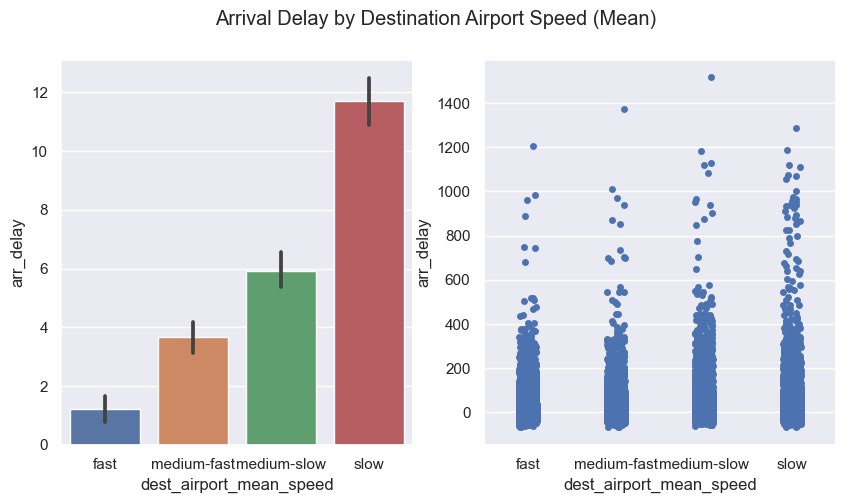

In [110]:
target_rel(df_flights, feature='dest_airport_mean_speed', feature_title='Destination Airport Speed (Mean)')

In [113]:
df_flights[['dest_city_name','dest_airport_mean_speed','mean_dest_airport_delay']].head(20)

,dest_city_name,dest_airport_mean_speed,mean_dest_airport_delay
0,"Oklahoma City, OK",slow,11.409396
1,"Omaha, NE",medium-slow,6.584570
2,"Omaha, NE",medium-slow,6.584570
3,"Ontario, CA",medium-fast,4.148026
4,"Ontario, CA",medium-fast,4.148026
5,"Ontario, CA",medium-fast,4.148026
6,"Ontario, CA",medium-fast,4.148026
7,"Portland, OR",fast,-0.467444
9,"Portland, OR",fast,-0.467444
10,"Portland, OR",fast,-0.467444


In [115]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'year', 'month', 'day', 'mean_arr_delay',
       'median_arr_delay', 'season', 'day_of_week', 'is_weekend', 'is_holiday',
       'crs_dep_time_hour', 'crs_dep_time_of_day', 'crs_arr_time_hour',
       'crs_arr_time_of_day', 'origin_state', 'dest_state', 'origin_region',
       'dest_region', 'haul', 'mean_origin_airport_delay',
       'origin_airport_mean_speed', 'median_origin_airport_delay',
       'origin_airport_median_speed', 'mean_dest_airport_delay',
       'dest_airport_mean_speed'],
      dtype='object')

In [122]:
compare = df_flights[df_flights['mkt_unique_carrier']==df_flights['op_unique_carrier']]

In [123]:
compare.shape

(62234, 45)

In [124]:
# mkt_unique_carrier and op_unique_carrier are often the same value, so drop one to reduce noise

In [125]:
df_flights[['mkt_unique_carrier','op_unique_carrier']].head(10)

,mkt_unique_carrier,op_unique_carrier
0,WN,WN
1,WN,WN
2,WN,WN
3,WN,WN
4,WN,WN
5,WN,WN
6,WN,WN
7,WN,WN
9,WN,WN
10,WN,WN


In [126]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'year', 'month', 'day', 'mean_arr_delay',
       'median_arr_delay', 'season', 'day_of_week', 'is_weekend', 'is_holiday',
       'crs_dep_time_hour', 'crs_dep_time_of_day', 'crs_arr_time_hour',
       'crs_arr_time_of_day', 'origin_state', 'dest_state', 'origin_region',
       'dest_region', 'haul', 'mean_origin_airport_delay',
       'origin_airport_mean_speed', 'median_origin_airport_delay',
       'origin_airport_median_speed', 'mean_dest_airport_delay',
       'dest_airport_mean_speed'],
      dtype='object')

In [127]:
# drop features

df_flights = df_flights.drop(columns=[
    'fl_date',
    'mkt_unique_carrier',
    'branded_code_share',
    'mkt_carrier',
    'mkt_carrier_fl_num',
    'tail_num',
    'op_carrier_fl_num',
    'origin_airport_id',
    'origin',
    'origin_city_name',
    'dest_airport_id',
    'dest',
    'dest_city_name',
    'crs_dep_time',
    'crs_arr_time',
    'dup',
    'flights',
    'distance',
    'year',
    'month',
    'day',
    'median_arr_delay',
    'crs_dep_time_hour',
    'crs_arr_time_hour',
    'origin_state', 
    'dest_state',
    'origin_airport_mean_speed',
    'median_origin_airport_delay',
    'origin_airport_median_speed',
    'dest_airport_mean_speed'
    ])

In [129]:
df_flights.shape

(98363, 15)

In [130]:
# make a pickle of the feature engineered data
import pickle

#Do Some Feature Engineering
feature_engineered_data2 = df_flights

#Dump it(save it in binary format)
with open(r'..\data\flight_data_engineered2.pickle','wb') as flight_data_file:
     pickle.dump(feature_engineered_data2, flight_data_file)

# Round 3

### Flight Number and Arr_Delay

In [118]:
# get the cleaned dataset

import pickle

with open(r'data\flight_data.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [119]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,9.0,19.0,0,0,N,140,124.0,112.0,1,986
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,241.0,46.0,0,0,N,150,161.0,142.0,1,1099
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1111.0,-9.0,0,0,N,150,145.0,132.0,1,1099
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,827.0,-3.0,0,0,N,55,50.0,34.0,1,197
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,1912.0,37.0,0,0,N,55,51.0,34.0,1,197


In [120]:
df_flights.shape

(99023, 32)

In [105]:
# are the same flight numbers used repeatedly for the same routes? Are the same flights consistently delayed?

# maybe try getting the average delay per carrier flight number using a larger random sample of the data?

In [121]:
filter_df = df_flights[['fl_date','op_unique_carrier','mkt_unique_carrier','op_carrier_fl_num','mkt_carrier_fl_num','crs_dep_time','arr_delay','origin_city_name','dest_city_name']].sort_values(['op_carrier_fl_num','op_unique_carrier'])
filter_df.head(10)

,fl_date,op_unique_carrier,mkt_unique_carrier,op_carrier_fl_num,mkt_carrier_fl_num,crs_dep_time,arr_delay,origin_city_name,dest_city_name
36262,2018-06-06,AA,AA,1,1,800,-47.0,"New York, NY","Los Angeles, CA"
61745,2019-01-14,AA,AA,1,1,800,0.0,"New York, NY","Los Angeles, CA"
82189,2018-07-27,AA,AA,1,1,800,35.0,"New York, NY","Los Angeles, CA"
87804,2019-04-05,AA,AA,1,1,800,-34.0,"New York, NY","Los Angeles, CA"
20271,2019-06-17,AS,AS,1,1,800,-4.0,"Washington, DC","Seattle, WA"
33579,2019-02-16,AS,AS,1,1,800,-44.0,"Washington, DC","Seattle, WA"
86258,2019-05-23,AS,AS,1,1,800,29.0,"Washington, DC","Seattle, WA"
92043,2019-03-02,AS,AS,1,1,800,-20.0,"Washington, DC","Seattle, WA"
100753,2019-07-30,AS,AS,1,1,800,-9.0,"Washington, DC","Seattle, WA"
8182,2018-08-28,B6,B6,1,1,1058,-38.0,"New York, NY","Fort Lauderdale, FL"


In [122]:
df_flights['carrier_fl_num'] =  df_flights['op_unique_carrier'] + df_flights['op_carrier_fl_num'].astype(str)

In [108]:
df_flights['carrier_fl_num'].value_counts()

UA269     29
UA264     27
OO3128    26
UA599     24
OO3523    24
F91701    22
F91702    22
UA270     22
AA2607    22
UA282     22
OO3129    22
UA2148    21
AA1409    21
WN37      21
DL1725    20
AA1391    19
NK195     19
UA257     19
AA565     19
WN36      19
UA597     18
WN1474    18
OH5545    18
OO3021    18
UA2133    18
DL1328    17
DL1334    17
UA2141    17
AA2796    17
AA560     17
AA2610    17
UA263     17
NK452     17
AA569     17
OH5214    17
OH5212    17
AA1875    16
9E3301    16
MQ3795    16
9E3298    16
PT4951    16
DL2399    16
WN34      16
9E3308    16
UA2134    16
OO3119    16
DL1327    16
DL1584    16
DL1069    16
DL1803    16
9E3295    16
UA2135    16
G74533    16
UA578     16
UA262     16
AA315     16
UA268     16
UA775     16
AA2604    16
DL899     16
G74529    16
OO3125    16
WN55      16
DL1325    16
OH5548    16
NK188     16
NK193     16
DL1521    16
YV5759    15
YV5754    15
DL668     15
OO3026    15
DL1076    15
AA1449    15
OH5667    15
OH5209    15
DL1816    15

In [109]:
# Carriers sometimes re-use flight numbers for different routes. Sometimes it seems like it depends on time of day (e.g. certain flight number used for certain route in the morning, and different route in the afternoon)

In [123]:
df_flights['crs_dep_time'] = pd.to_datetime(df_flights['crs_dep_time'], format = '%H%M', errors = 'coerce')

In [124]:
df_flights['crs_dep_time_hour'] = df_flights['crs_dep_time'].dt.hour

In [125]:
df_flights.shape

(99023, 34)

In [126]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [1, 5, 10, 15, 20, 24]
df_flights['crs_dep_time_of_day'] = pd.cut(df_flights['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [127]:
df_flights.shape

(99023, 35)

In [128]:
df_filter = df_flights[['carrier_fl_num','crs_dep_time_of_day','arr_delay']]
group = df_filter.groupby(['carrier_fl_num','crs_dep_time_of_day']).mean('arr_delay')
group.head()

arr_delay
carrier_fl_num crs_dep_time_of_day           
9E3280         early morning              NaN
               late morning         54.000000
               midday              -10.000000
               late afternoon       -7.333333
               evening                    NaN

In [26]:
df_flights['carrier_fl_num_TOD'] = df_flights['carrier_fl_num'] + '-' + df_flights['crs_dep_time_of_day'].astype(str)

In [27]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_fl_num,crs_dep_time_hour,crs_dep_time_of_day,carrier_fl_num_TOD
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,N,140,124.0,112.0,1,986,WN5431,19.0,late afternoon,WN5431-late afternoon
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,N,150,161.0,142.0,1,1099,WN989,21.0,evening,WN989-evening
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,N,150,145.0,132.0,1,1099,WN1664,6.0,late morning,WN1664-late morning
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,N,55,50.0,34.0,1,197,WN1106,7.0,late morning,WN1106-late morning
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,N,55,51.0,34.0,1,197,WN1559,17.0,late afternoon,WN1559-late afternoon


In [28]:
filter_df = df_flights[['carrier_fl_num_TOD','arr_delay']]
filter_df.head()

,carrier_fl_num_TOD,arr_delay
0,WN5431-late afternoon,19.0
1,WN989-evening,46.0
2,WN1664-late morning,-9.0
3,WN1106-late morning,-3.0
4,WN1559-late afternoon,37.0


In [ ]:
# df.groupby([col1, col2]).mean()
# df[[col1, col2, col3]].groupby([col1, col2]).mean()

In [29]:
mean_flight_num_delay = filter_df.groupby('carrier_fl_num_TOD').agg(mean_arr_delay = ('arr_delay','mean')).sort_values(by='carrier_fl_num_TOD')

In [30]:
mean_flight_num_delay.head()

,mean_arr_delay
carrier_fl_num_TOD,
9E3280-late afternoon,-7.333333
9E3280-late morning,54.000000
9E3280-midday,-10.000000
9E3281-late afternoon,16.500000
9E3281-late morning,-3.500000


In [32]:
mean_flight_num_delay = mean_flight_num_delay.T

In [33]:
mean_flight_num_delay.head()

carrier_fl_num_TOD,9E3280-late afternoon,9E3280-late morning,9E3280-midday,9E3281-late afternoon,9E3281-late morning,9E3281-midday,9E3282-late afternoon,9E3282-late morning,9E3282-midday,9E3283-late afternoon,...,ZW4876-evening,ZW4876-late afternoon,ZW4876-late morning,ZW4877-late afternoon,ZW4877-midday,ZW4878-late afternoon,ZW4878-late morning,ZW4878-midday,ZW4879-late afternoon,ZW4879-midday
mean_arr_delay,-7.333333,54.0,-10.0,16.5,-3.5,-3.25,-14.5,-11.6,-0.5,-3.666667,...,-11.0,0.5,-1.285714,57.333333,-9.833333,-28.0,-14.0,-22.333333,11.0,-18.714286


In [34]:
flight_dict = mean_flight_num_delay.to_dict('records')

In [35]:
flight_dict

[{'9E3280-late afternoon': -7.333333333333333,
  '9E3280-late morning': 54.0,
  '9E3280-midday': -10.0,
  '9E3281-late afternoon': 16.5,
  '9E3281-late morning': -3.5,
  '9E3281-midday': -3.25,
  '9E3282-late afternoon': -14.5,
  '9E3282-late morning': -11.6,
  '9E3282-midday': -0.5,
  '9E3283-late afternoon': -3.6666666666666665,
  '9E3283-late morning': -9.0,
  '9E3283-midday': 20.75,
  '9E3284-early morning': -11.0,
  '9E3284-evening': -21.5,
  '9E3284-late afternoon': -8.0,
  '9E3284-late morning': -4.0,
  '9E3284-midday': -14.0,
  '9E3285-evening': -15.5,
  '9E3285-late afternoon': -4.0,
  '9E3285-late morning': -7.2,
  '9E3285-midday': 276.75,
  '9E3286-late afternoon': -19.0,
  '9E3286-late morning': -11.333333333333334,
  '9E3286-midday': -15.88888888888889,
  '9E3287-late afternoon': 13.0,
  '9E3287-late morning': 27.0,
  '9E3287-midday': 1.0,
  '9E3288-evening': -10.5,
  '9E3288-late afternoon': -18.0,
  '9E3288-late morning': 4.5,
  '9E3288-midday': -4.0,
  '9E3289-evening':

In [36]:
df_flights['mean_flight_num_delay'] = df_flights['carrier_fl_num_TOD'].map(flight_dict[0])

In [37]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_fl_num,crs_dep_time_hour,crs_dep_time_of_day,carrier_fl_num_TOD,mean_flight_num_delay
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,140,124.0,112.0,1,986,WN5431,19.0,late afternoon,WN5431-late afternoon,-0.666667
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,150,161.0,142.0,1,1099,WN989,21.0,evening,WN989-evening,46.000000
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,150,145.0,132.0,1,1099,WN1664,6.0,late morning,WN1664-late morning,-9.000000
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,55,50.0,34.0,1,197,WN1106,7.0,late morning,WN1106-late morning,-14.000000
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,55,51.0,34.0,1,197,WN1559,17.0,late afternoon,WN1559-late afternoon,37.000000


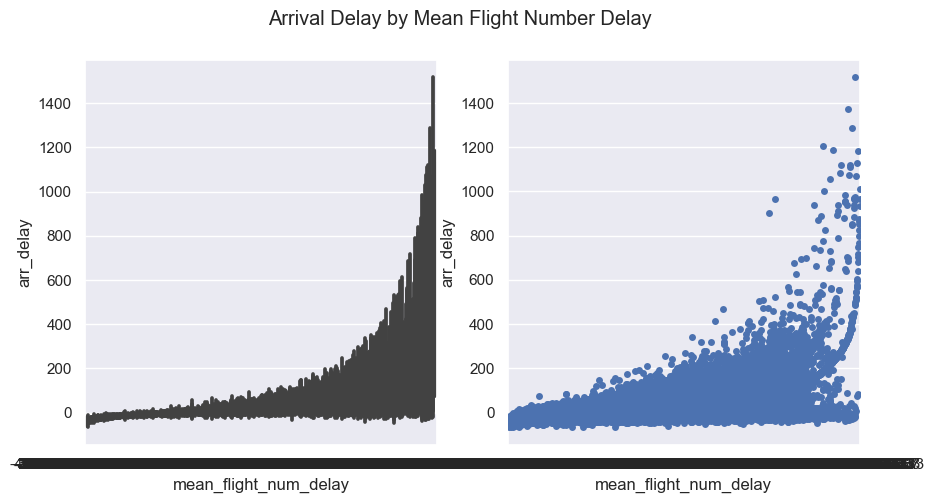

In [40]:
target_rel(df_flights, feature='mean_flight_num_delay', feature_title='Mean Flight Number Delay')

Text(0.5, 1.0, 'Arrival Delay by Mean Flight Number Delay')

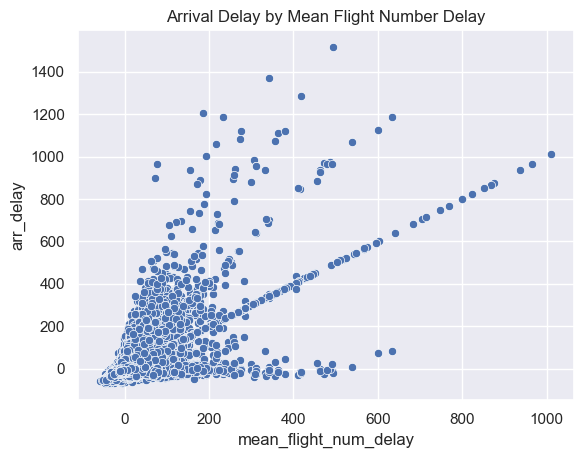

In [41]:
g = sns.scatterplot(data=df_flights, x='mean_flight_num_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Flight Number Delay')

In [42]:
df_flights['mean_flight_num_delay'].corr(df_flights['arr_delay'])

0.698285469115315

In [43]:
len(df_flights[df_flights['mean_flight_num_delay']==df_flights['arr_delay']])

23368

In [44]:
len(df_flights[df_flights['mean_flight_num_delay']==1])

941

In [54]:
unique_flights = df_flights['carrier_fl_num_TOD'].nunique()
unique_flights

46366

In [55]:
one_flight_only = sum(df_flights['carrier_fl_num_TOD'].value_counts()==1)
one_flight_only

22612

In [56]:
percent_one_flight_only = 100*(one_flight_only/unique_flights)
percent_one_flight_only

48.76849415519993

In [272]:
df_flights['arr_delay'].describe()

count    99023.000000
mean         5.392424
std         48.508627
min        -68.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1516.000000
Name: arr_delay, dtype: float64

In [261]:
# drop features

df_flights = df_flights[['mean_flight_num_delay','arr_delay']]

In [268]:
df_flights.head(20)

,mean_flight_num_delay,arr_delay
0,-0.666667,19.0
1,46.000000,46.0
2,-9.000000,-9.0
3,-14.000000,-3.0
4,37.000000,37.0
5,15.000000,15.0
6,29.000000,29.0
7,-8.000000,5.0
8,-8.500000,3.0
9,71.000000,71.0


In [ ]:
df_flights.shape

(98363, 15)

In [264]:
# make a pickle of the feature engineered data
import pickle

#Do Some Feature Engineering
feature_engineered_data3 = df_flights

#Dump it(save it in binary format)
with open(r'..\data\flight_data_engineered3.pickle','wb') as flight_data_file:
     pickle.dump(feature_engineered_data3, flight_data_file)

# Round 4

In [57]:
# pull more data to get better information about mean delay by flight number by reducing the percentage of flights for which we have only one data point

In [58]:
# import os
# os.chdir('..')

In [59]:
from src.modules import connect_lhl, test_models

In [60]:
conn = connect_lhl.lhl_delay_data('lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com','mid_term_project','lhl_student','lhl_student', 0)
conn.connection()
df_flights = conn.sample_table('flights','500000')

c:\Users\User\Documents\projects\LHL_midterm_flight_delay\src\modules\connect_lhl.py:51: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_return = sqlio.read_sql_query(query, self.connection())


In [61]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-05,AA,AA,AA,188,AA,N969TW,188,12339,IND,...,761.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-04-07,UA,UA_CODESHARE,UA,4620,AX,N11113,4620,12896,LBB,...,456.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-10-10,DL,DL_CODESHARE,DL,3783,OO,N693CA,3783,13487,MSP,...,852.0,0.0,0.0,3.0,0.0,108.0,None,NaN,NaN,None
3,2018-10-11,DL,DL,DL,2445,DL,N891AT,2445,11259,DAL,...,721.0,0.0,0.0,2.0,0.0,57.0,None,NaN,NaN,None
4,2018-03-09,WN,WN,WN,6144,WN,N792SW,6144,12953,LGA,...,888.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [62]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              500000 non-null  object 
 1   mkt_unique_carrier   500000 non-null  object 
 2   branded_code_share   500000 non-null  object 
 3   mkt_carrier          500000 non-null  object 
 4   mkt_carrier_fl_num   500000 non-null  int64  
 5   op_unique_carrier    500000 non-null  object 
 6   tail_num             498508 non-null  object 
 7   op_carrier_fl_num    500000 non-null  int64  
 8   origin_airport_id    500000 non-null  int64  
 9   origin               500000 non-null  object 
 10  origin_city_name     500000 non-null  object 
 11  dest_airport_id      500000 non-null  int64  
 12  dest                 500000 non-null  object 
 13  dest_city_name       500000 non-null  object 
 14  crs_dep_time         500000 non-null  int64  
 15  dep_time         

In [63]:
# make a pickle of the new sample data
import pickle

flights_random_sample_500K = df_flights

with open(r'data\flights_random_sample_500K.pickle','wb') as flight_data_file:
     pickle.dump(flights_random_sample_500K, flight_data_file)

In [64]:
100*(df_flights.isnull().sum()/len(df_flights))

fl_date                  0.0000
mkt_unique_carrier       0.0000
branded_code_share       0.0000
mkt_carrier              0.0000
mkt_carrier_fl_num       0.0000
op_unique_carrier        0.0000
tail_num                 0.2984
op_carrier_fl_num        0.0000
origin_airport_id        0.0000
origin                   0.0000
origin_city_name         0.0000
dest_airport_id          0.0000
dest                     0.0000
dest_city_name           0.0000
crs_dep_time             0.0000
dep_time                 1.6110
dep_delay                1.6406
taxi_out                 1.6958
wheels_off               1.6956
wheels_on                1.7400
taxi_in                  1.7402
crs_arr_time             0.0000
arr_time                 1.7038
arr_delay                1.9416
cancelled                0.0000
cancellation_code       94.5850
diverted                 0.0000
dup                      0.0000
crs_elapsed_time         0.0000
actual_elapsed_time      1.9258
air_time                 1.9620
flights 

In [65]:
# drop features with more than 80% missing values

df_flights = df_flights.dropna(thresh=df_flights.shape[0]*0.8,axis=1)

In [68]:
# because remaining features with missing values make up such a small proportino of the data, drop observations with missing values

df_flights = df_flights.dropna()

In [69]:
sum(df_flights.isnull().sum())

0

In [70]:
df_flights.shape

(489978, 32)

In [71]:
# make a pickle of the cleaned data
import pickle

flights_random_sample_500K = df_flights

with open(r'data\flight_data_500K.pickle','wb') as flight_data_file:
     pickle.dump(flights_random_sample_500K, flight_data_file)

In [73]:
df_flights['carrier_fl_num'] =  df_flights['op_unique_carrier'] + df_flights['op_carrier_fl_num'].astype(str)

In [75]:
df_flights['crs_dep_time'] = pd.to_datetime(df_flights['crs_dep_time'], format = '%H%M', errors = 'coerce')

In [76]:
df_flights['crs_dep_time_hour'] = df_flights['crs_dep_time'].dt.hour

In [77]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [1, 5, 10, 15, 20, 24]
df_flights['crs_dep_time_of_day'] = pd.cut(df_flights['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [78]:
df_flights['carrier_fl_num_TOD'] = df_flights['carrier_fl_num'] + '-' + df_flights['crs_dep_time_of_day'].astype(str)

In [79]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_fl_num,crs_dep_time_hour,crs_dep_time_of_day,carrier_fl_num_TOD
0,2019-01-05,AA,AA,AA,188,AA,N969TW,188,12339,IND,...,N,156.0,128.0,107.0,1.0,761.0,AA188,12.0,midday,AA188-midday
1,2019-04-07,UA,UA_CODESHARE,UA,4620,AX,N11113,4620,12896,LBB,...,N,96.0,97.0,64.0,1.0,456.0,AX4620,6.0,late morning,AX4620-late morning
2,2019-10-10,DL,DL_CODESHARE,DL,3783,OO,N693CA,3783,13487,MSP,...,N,171.0,174.0,129.0,1.0,852.0,OO3783,7.0,late morning,OO3783-late morning
3,2018-10-11,DL,DL,DL,2445,DL,N891AT,2445,11259,DAL,...,N,124.0,109.0,89.0,1.0,721.0,DL2445,18.0,late afternoon,DL2445-late afternoon
4,2018-03-09,WN,WN,WN,6144,WN,N792SW,6144,12953,LGA,...,N,180.0,153.0,131.0,1.0,888.0,WN6144,17.0,late afternoon,WN6144-late afternoon


In [80]:
filter_df = df_flights[['carrier_fl_num_TOD','arr_delay']]
filter_df.head()

,carrier_fl_num_TOD,arr_delay
0,AA188-midday,14.0
1,AX4620-late morning,-3.0
2,OO3783-late morning,111.0
3,DL2445-late afternoon,59.0
4,WN6144-late afternoon,10.0


In [81]:
mean_flight_num_delay = filter_df.groupby('carrier_fl_num_TOD').agg(mean_arr_delay = ('arr_delay','mean')).sort_values(by='carrier_fl_num_TOD')

In [82]:
mean_flight_num_delay.head()

,mean_arr_delay
carrier_fl_num_TOD,
9E3280-late afternoon,16.187500
9E3280-late morning,-7.600000
9E3280-midday,-1.333333
9E3281-late afternoon,28.000000
9E3281-late morning,-6.100000


In [83]:
mean_flight_num_delay = mean_flight_num_delay.T

In [84]:
mean_flight_num_delay.head()

carrier_fl_num_TOD,9E3280-late afternoon,9E3280-late morning,9E3280-midday,9E3281-late afternoon,9E3281-late morning,9E3281-midday,9E3282-evening,9E3282-late afternoon,9E3282-late morning,9E3282-midday,...,ZW4876-evening,ZW4876-late afternoon,ZW4876-late morning,ZW4877-late afternoon,ZW4877-midday,ZW4878-late afternoon,ZW4878-late morning,ZW4878-midday,ZW4879-late morning,ZW4879-midday
mean_arr_delay,16.1875,-7.6,-1.333333,28.0,-6.1,3.8,-13.0,-2.076923,-4.875,9.777778,...,1.0,118.5,-12.8,-0.5,-10.2,5.583333,-2.4,-18.0,-8.8,6.727273


In [85]:
flight_dict = mean_flight_num_delay.to_dict('records')

In [86]:
flight_dict

[{'9E3280-late afternoon': 16.1875,
  '9E3280-late morning': -7.6,
  '9E3280-midday': -1.3333333333333333,
  '9E3281-late afternoon': 28.0,
  '9E3281-late morning': -6.1,
  '9E3281-midday': 3.8,
  '9E3282-evening': -13.0,
  '9E3282-late afternoon': -2.076923076923077,
  '9E3282-late morning': -4.875,
  '9E3282-midday': 9.777777777777779,
  '9E3283-late afternoon': 0.6875,
  '9E3283-late morning': 6.0,
  '9E3283-midday': 24.714285714285715,
  '9E3284-early morning': -12.0,
  '9E3284-evening': 8.333333333333334,
  '9E3284-late afternoon': -4.8,
  '9E3284-late morning': -4.5,
  '9E3284-midday': 6.333333333333333,
  '9E3285-evening': -7.0,
  '9E3285-late morning': -17.0,
  '9E3285-midday': 18.866666666666667,
  '9E3286-late afternoon': -18.0,
  '9E3286-late morning': 20.5,
  '9E3286-midday': 9.0,
  '9E3287-late afternoon': -3.066666666666667,
  '9E3287-late morning': -23.666666666666668,
  '9E3287-midday': -10.375,
  '9E3288-evening': -1.0,
  '9E3288-late afternoon': -1.0,
  '9E3288-late m

In [87]:
df_flights['mean_flight_num_delay'] = df_flights['carrier_fl_num_TOD'].map(flight_dict[0])

In [88]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_fl_num,crs_dep_time_hour,crs_dep_time_of_day,carrier_fl_num_TOD,mean_flight_num_delay
0,2019-01-05,AA,AA,AA,188,AA,N969TW,188,12339,IND,...,156.0,128.0,107.0,1.0,761.0,AA188,12.0,midday,AA188-midday,-4.125000
1,2019-04-07,UA,UA_CODESHARE,UA,4620,AX,N11113,4620,12896,LBB,...,96.0,97.0,64.0,1.0,456.0,AX4620,6.0,late morning,AX4620-late morning,-2.500000
2,2019-10-10,DL,DL_CODESHARE,DL,3783,OO,N693CA,3783,13487,MSP,...,171.0,174.0,129.0,1.0,852.0,OO3783,7.0,late morning,OO3783-late morning,32.666667
3,2018-10-11,DL,DL,DL,2445,DL,N891AT,2445,11259,DAL,...,124.0,109.0,89.0,1.0,721.0,DL2445,18.0,late afternoon,DL2445-late afternoon,-0.777778
4,2018-03-09,WN,WN,WN,6144,WN,N792SW,6144,12953,LGA,...,180.0,153.0,131.0,1.0,888.0,WN6144,17.0,late afternoon,WN6144-late afternoon,10.000000


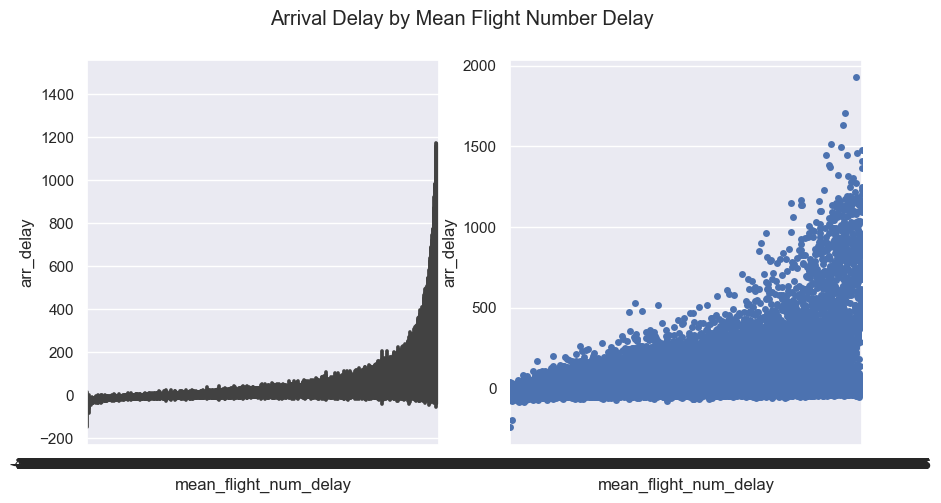

In [89]:
target_rel(df_flights, feature='mean_flight_num_delay', feature_title='Mean Flight Number Delay')

Text(0.5, 1.0, 'Arrival Delay by Mean Flight Number Delay')

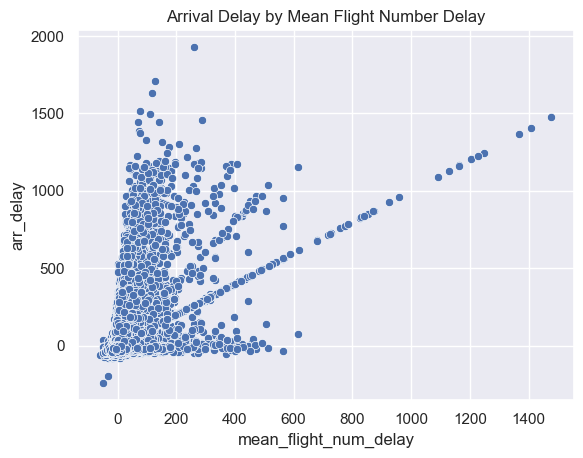

In [90]:
g = sns.scatterplot(data=df_flights, x='mean_flight_num_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Flight Number Delay')

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, target, seed=123)

In [91]:
df_flights['mean_flight_num_delay'].corr(df_flights['arr_delay'])

0.4516781094839426

In [92]:
len(df_flights[df_flights['mean_flight_num_delay']==df_flights['arr_delay']])

19789

In [93]:
len(df_flights[df_flights['mean_flight_num_delay']==1])

1960

In [94]:
unique_flights = df_flights['carrier_fl_num_TOD'].nunique()
unique_flights

82406

In [95]:
one_flight_only = sum(df_flights['carrier_fl_num_TOD'].value_counts()==1)
one_flight_only

18009

In [96]:
percent_one_flight_only = 100*(one_flight_only/unique_flights)
percent_one_flight_only

21.853991214231975

In [97]:
df_flights['arr_delay'].describe()

count    489978.000000
mean          5.542463
std          49.869016
min        -243.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1928.000000
Name: arr_delay, dtype: float64

In [98]:
# drop features

df_flights = df_flights[['mean_flight_num_delay','arr_delay']]

In [99]:
df_flights.head(20)

,mean_flight_num_delay,arr_delay
0,-4.125000,14.0
1,-2.500000,-3.0
2,32.666667,111.0
3,-0.777778,59.0
4,10.000000,10.0
5,-0.562500,3.0
6,-9.444444,-27.0
7,18.333333,49.0
8,15.777778,-18.0
9,2.000000,0.0


In [100]:
df_flights.shape

(489978, 2)

In [101]:
# make a pickle of the feature engineered data
import pickle

feature_engineered_data4 = df_flights

with open(r'data\flight_data_engineered4.pickle','wb') as flight_data_file:
     pickle.dump(feature_engineered_data4, flight_data_file)

# Round 5

In [ ]:
# split training set and test set before getting mean arrival delay by carrier+fl_num+TOD, map those results to the training set AND FILL NA using KNN, split carrier+fl_num+TOD back up again

In [317]:
# get the cleaned dataset

import pickle

with open(r'data\flight_data_500K.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [318]:
X = df_flights.drop(columns='arr_delay')
y = df_flights['arr_delay']

In [475]:
X.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance'],
      dtype='object')

In [319]:
X.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_arr_time,arr_time,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2019-01-05,AA,AA,AA,188,AA,N969TW,188,12339,IND,...,1346,1400.0,0.0,0.0,N,156.0,128.0,107.0,1.0,761.0
1,2019-04-07,UA,UA_CODESHARE,UA,4620,AX,N11113,4620,12896,LBB,...,646,643.0,0.0,0.0,N,96.0,97.0,64.0,1.0,456.0
2,2019-10-10,DL,DL_CODESHARE,DL,3783,OO,N693CA,3783,13487,MSP,...,1000,1151.0,0.0,0.0,N,171.0,174.0,129.0,1.0,852.0
3,2018-10-11,DL,DL,DL,2445,DL,N891AT,2445,11259,DAL,...,2144,2243.0,0.0,0.0,N,124.0,109.0,89.0,1.0,721.0
4,2018-03-09,WN,WN,WN,6144,WN,N792SW,6144,12953,LGA,...,1955,2005.0,0.0,0.0,N,180.0,153.0,131.0,1.0,888.0


In [320]:
y.head()

0     14.0
1     -3.0
2    111.0
3     59.0
4     10.0
Name: arr_delay, dtype: float64

In [321]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [322]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(367483, 31)
(122495, 31)
(367483,)
(122495,)


# Add Feature to Training Set

In [323]:
df_flights_train = pd.concat([X_train, y_train], axis=1)

In [327]:
df_flights_train['crs_dep_time'] = pd.to_datetime(df_flights_train['crs_dep_time'], format = '%H%M', errors = 'coerce')

In [328]:
df_flights_train[df_flights_train['crs_dep_time'].isnull()]['crs_dep_time']

365066   NaT
275113   NaT
451735   NaT
40607    NaT
232925   NaT
371729   NaT
403654   NaT
48345    NaT
446499   NaT
156834   NaT
451597   NaT
201794   NaT
443325   NaT
407696   NaT
497890   NaT
455395   NaT
8244     NaT
6495     NaT
340842   NaT
271347   NaT
66497    NaT
321177   NaT
421705   NaT
239095   NaT
178111   NaT
477969   NaT
246920   NaT
100848   NaT
499671   NaT
303519   NaT
209907   NaT
68349    NaT
116966   NaT
111042   NaT
287629   NaT
65647    NaT
451790   NaT
478620   NaT
132268   NaT
155359   NaT
376988   NaT
228682   NaT
291544   NaT
107641   NaT
339391   NaT
439471   NaT
212914   NaT
206676   NaT
436260   NaT
471016   NaT
256382   NaT
76298    NaT
328113   NaT
485970   NaT
122297   NaT
159496   NaT
158882   NaT
198615   NaT
373184   NaT
386786   NaT
48444    NaT
46611    NaT
354445   NaT
309768   NaT
Name: crs_dep_time, dtype: datetime64[ns]

In [329]:
df_flights_train = df_flights_train[(df_flights_train['crs_dep_time'].isnull()==False)]

In [332]:
df_flights_train['crs_dep_time_hour'] = df_flights_train['crs_dep_time'].dt.hour

In [334]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [1, 5, 10, 15, 20, 24]
df_flights_train['crs_dep_time_of_day'] = pd.cut(df_flights_train['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [437]:
# build dict1: carrier+fl_num+TOD+origin+dest

filter_df = df_flights_train[['op_unique_carrier','op_carrier_fl_num','crs_dep_time_of_day','origin_city_name','dest_city_name','arr_delay']]
mean_arr_delay_1 = filter_df.groupby(['op_unique_carrier','op_carrier_fl_num','crs_dep_time_of_day','origin_city_name','dest_city_name'],observed=True).agg(mean_arr_delay=('arr_delay', 'mean'), samples=('arr_delay', 'count'))

# drop all elements in dict1 that don't have at least 5 samples

mean_arr_delay_1 = mean_arr_delay_1[mean_arr_delay_1['samples']>5]
mean_arr_delay_1 = mean_arr_delay_1.reset_index()
mean_arr_delay_1.head()

# build dict

mean_arr_delay_1['key'] = mean_arr_delay_1['op_unique_carrier']+mean_arr_delay_1['op_carrier_fl_num'].astype(str)+mean_arr_delay_1['crs_dep_time_of_day'].astype(str)+mean_arr_delay_1['origin_city_name']+mean_arr_delay_1['dest_city_name']
mean_arr_delay_1 = mean_arr_delay_1[['key','mean_arr_delay']]
mean_arr_delay_1.set_index('key',inplace=True)
mean_arr_delay_1 = mean_arr_delay_1.T
dict1 = mean_arr_delay_1.to_dict('records')
dict1

[{'9E3283late afternoonAtlanta, GASpringfield, MO': 2.5714285714285716,
  '9E3286late morningSpringfield, MOAtlanta, GA': 30.666666666666668,
  '9E3295late afternoonDetroit, MIIndianapolis, IN': -2.5,
  '9E3302late morningAtlanta, GAKnoxville, TN': -8.833333333333334,
  '9E3302late afternoonNew York, NYCincinnati, OH': 15.0,
  '9E3305early morningAugusta, GAAtlanta, GA': -9.428571428571429,
  '9E3312middayAtlanta, GAFlint, MI': 8.333333333333334,
  '9E3313late morningNew York, NYIndianapolis, IN': -16.0,
  '9E3313middayIndianapolis, INNew York, NY': -14.285714285714286,
  '9E3314late afternoonRochester, NYNew York, NY': 17.5,
  '9E3338late afternoonNew York, NYPortland, ME': 7.333333333333333,
  '9E3345late afternoonCincinnati, OHNew York, NY': 38.0,
  '9E3353late morningBaltimore, MDNew York, NY': 1.1666666666666667,
  '9E3356late morningDetroit, MIKnoxville, TN': -12.428571428571429,
  '9E3357late afternoonAtlanta, GAColumbus, GA': 16.77777777777778,
  '9E3380middayKansas City, MONew

In [478]:
# build dict2: TOD+origin+dest

filter_df = df_flights_train[['crs_dep_time_of_day','origin_city_name','dest_city_name','arr_delay']]
mean_arr_delay_2 = filter_df.groupby(['crs_dep_time_of_day','origin_city_name','dest_city_name'],observed=True).agg(mean_arr_delay=('arr_delay', 'mean'), samples=('arr_delay', 'count'))
mean_arr_delay_2.head()
# # drop all elements in dict2 that don't have at least 5 samples

# mean_arr_delay_2 = mean_arr_delay_2[mean_arr_delay_2['samples']>5]
# mean_arr_delay_2 = mean_arr_delay_2.reset_index()
# mean_arr_delay_2.head()

# # build dict2

# mean_arr_delay_2['key'] = mean_arr_delay_2['crs_dep_time_of_day'].astype(str)+mean_arr_delay_2['origin_city_name']+mean_arr_delay_2['dest_city_name']
# mean_arr_delay_2 = mean_arr_delay_2[['key','mean_arr_delay']]
# mean_arr_delay_2.set_index('key',inplace=True)
# mean_arr_delay_2 = mean_arr_delay_2.T
# dict2 = mean_arr_delay_2.to_dict('records')
# dict2

mean_arr_delay  \
crs_dep_time_of_day origin_city_name dest_city_name                          
early morning       Aberdeen, SD     Minneapolis, MN             41.687500   
                    Abilene, TX      Dallas/Fort Worth, TX       -3.000000   
                    Aguadilla, PR    Fort Lauderdale, FL          3.166667   
                                     New York, NY                -7.000000   
                                     Orlando, FL                 44.933333   

                                                            samples  
crs_dep_time_of_day origin_city_name dest_city_name                  
early morning       Aberdeen, SD     Minneapolis, MN             16  
                    Abilene, TX      Dallas/Fort Worth, TX        7  
                    Aguadilla, PR    Fort Lauderdale, FL         18  
                                     New York, NY                15  
                                     Orlando, FL                 15

In [446]:
# build dict3: TOD

filter_df = df_flights_train[['crs_dep_time_of_day','arr_delay']]
mean_arr_delay_3 = filter_df.groupby(['crs_dep_time_of_day'],observed=True).agg(mean_arr_delay=('arr_delay', 'mean'), samples=('arr_delay', 'count'))

# drop all elements in dict3 that don't have at least 5 samples

mean_arr_delay_3 = mean_arr_delay_3[mean_arr_delay_3['samples']>5]
mean_arr_delay_3 = mean_arr_delay_3.reset_index()
mean_arr_delay_3.head()

# build dict3

mean_arr_delay_3['key'] = mean_arr_delay_3['crs_dep_time_of_day'].astype(str)
mean_arr_delay_3 = mean_arr_delay_3[['key','mean_arr_delay']]
mean_arr_delay_3.set_index('key',inplace=True)
mean_arr_delay_3 = mean_arr_delay_3.T
dict3 = mean_arr_delay_3.to_dict('records')
dict3


[{'early morning': -1.4915675116399378,
  'late morning': 0.02090569173244703,
  'midday': 6.117748559822416,
  'late afternoon': 11.636459143968871,
  'evening': 7.501872820424506}]

In [464]:
df_flights_train = df_flights_train.reset_index()

In [471]:
df_flights_train.head(5)

,index,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,air_time,flights,distance,arr_delay,crs_dep_time_hour,crs_dep_time_of_day,key1,key2,key3,mean_flight_num_delay
0,301432,2019-04-20,UA,UA_CODESHARE,UA,5510,OO,N142SY,5510,12892,...,33.0,1.0,156.0,-34.0,22,evening,"OO5510eveningLos Angeles, CASan Luis Obispo, CA","eveningLos Angeles, CASan Luis Obispo, CA",evening,-9.166667
1,66582,2019-07-15,AA,AA,AA,2570,AA,N342AN,2570,13303,...,153.0,1.0,1013.0,0.0,13,midday,"AA2570middayMiami, FLPhiladelphia, PA","middayMiami, FLPhiladelphia, PA",midday,27.148148
2,49986,2018-02-22,WN,WN,WN,623,WN,N8643A,623,10397,...,62.0,1.0,432.0,-14.0,21,evening,"WN623eveningAtlanta, GAIndianapolis, IN","eveningAtlanta, GAIndianapolis, IN",evening,14.634146
3,358318,2018-07-20,WN,WN,WN,1902,WN,N760SW,1902,14771,...,69.0,1.0,414.0,10.0,13,midday,"WN1902middaySan Francisco, CALas Vegas, NV","middaySan Francisco, CALas Vegas, NV",midday,13.831933
4,88298,2019-04-12,AA,AA,AA,1172,AA,N922AN,1172,11057,...,92.0,1.0,575.0,19.0,18,late afternoon,"AA1172late afternoonCharlotte, NCSt. Louis, MO","late afternoonCharlotte, NCSt. Louis, MO",late afternoon,8.920000


In [474]:
test = df_flights_train.groupby('op_unique_carrier')['arr_delay'].mean()
test

op_unique_carrier
9E     4.110224
9K    -5.100000
AA     6.345308
AS     0.665094
AX    15.830324
B6    11.649223
C5    24.599076
CP     5.377483
DL     0.449739
EM     2.558824
EV    12.210212
F9    10.564718
G4    10.730312
G7     9.599589
HA     0.599746
KS    23.413043
MQ     6.438632
NK     5.379369
OH     7.689845
OO     7.471782
PT     5.398743
QX     2.270196
UA     6.767088
VX     2.873762
WN     3.352647
YV     9.128563
YX     3.512586
ZW     8.410262
Name: arr_delay, dtype: float64

In [477]:
test = df_flights_train.groupby(['op_unique_carrier','op_carrier_fl_num','crs_dep_time_of_day','origin_city_name','dest_city_name'])['arr_delay'].transform('mean')
test.head(10)

0   -10.933333
1    32.222222
2    -0.500000
3    10.000000
4     5.666667
5    10.000000
6   -14.666667
7    10.000000
8   -14.500000
9    -5.000000
Name: arr_delay, dtype: float64

In [ ]:
df_flights_train['mean_flight_num_delay'] = df_flights_train.groupby('op_unique_carrier')

In [ ]:
def agg_filler(row):
    if row['agg1'].notnull():
        return row['agg1']
    elif row['agg2'].notnull():
        return row['agg2']
    else:
        return row['agg3']

df['d'] = df.apply(agg_filler, axis=1)


In [467]:
key1 = df_flights_train['op_unique_carrier'] + df_flights_train['op_carrier_fl_num'].astype(str) + df_flights_train['crs_dep_time_of_day'].astype(str) + df_flights_train['origin_city_name'] + df_flights_train['dest_city_name']
key2 = df_flights_train['crs_dep_time_of_day'].astype(str)+ df_flights_train['origin_city_name']+ df_flights_train['dest_city_name']
key3 = df_flights_train['crs_dep_time_of_day'].astype(str)

df_flights_train['key1'] = key1
df_flights_train['key2'] = key2
df_flights_train['key3'] = key3

for ind in df_flights_train.index:

    if df_flights_train['key1'][ind] in dict1[0]:
            
        df_flights_train['mean_flight_num_delay'] = df_flights_train['key1'].map(dict1[0])

    elif df_flights_train['key2'][ind] in dict2[0]:

        df_flights_train['mean_flight_num_delay'] = df_flights_train['key2'].map(dict2[0])

    else:

        df_flights_train['mean_flight_num_delay'] = df_flights_train['key3'].map(dict3[0])

KeyboardInterrupt: 

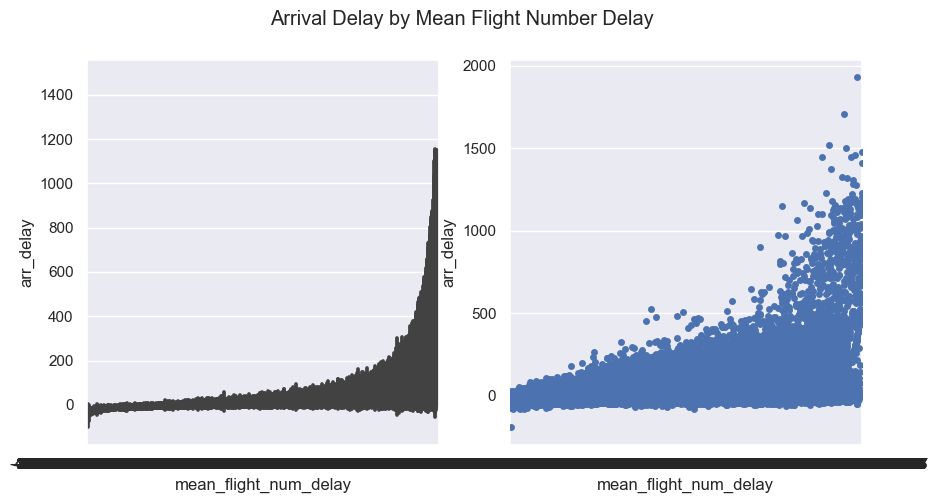

In [240]:
# target_rel(df_flights_train, feature='mean_flight_num_delay', feature_title='Mean Flight Number Delay')

Text(0.5, 1.0, 'Arrival Delay by Mean Flight Number Delay')

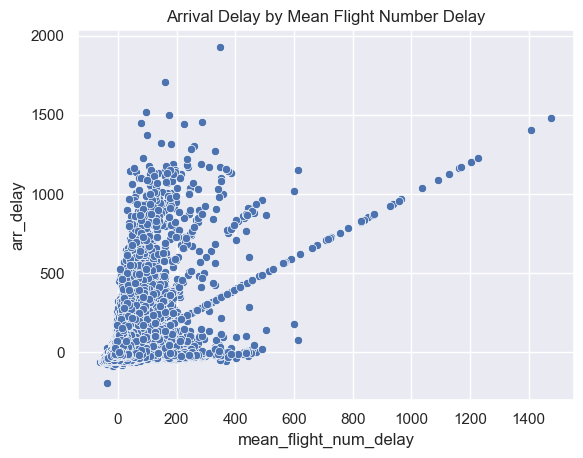

In [241]:
g = sns.scatterplot(data=df_flights_train, x='mean_flight_num_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Flight Number Delay')

In [242]:
df_flights_train['mean_flight_num_delay'].corr(df_flights_train['arr_delay'])

0.49554328298056727

In [244]:
len(df_flights_train[df_flights_train['mean_flight_num_delay']==df_flights_train['arr_delay']])

21553

In [252]:
unique_flights = (df_flights_train['op_unique_carrier'] + df_flights_train['op_carrier_fl_num'] + df_flights_train['crs_dep_time_of_day']).nunique()
unique_flights

76942

In [253]:
one_flight_only = sum((df_flights_train['op_unique_carrier'] + df_flights_train['op_carrier_fl_num'] + df_flights_train['crs_dep_time_of_day']).value_counts()==1)
one_flight_only

20006

In [254]:
percent_one_flight_only = 100*(one_flight_only/unique_flights)
percent_one_flight_only

26.001403654700944

In [258]:
# make a pickle of the feature engineered training data
import pickle

feature_engineered_data5 = df_flights_train

with open(r'data\flight_data_engineered5.pickle','wb') as flight_data_file:
     pickle.dump(feature_engineered_data5, flight_data_file)

# Add Feature to Test Set

In [ ]:
df_flights_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
df_flights_test['crs_dep_time'] = pd.to_datetime(df_flights_test['crs_dep_time'], format = '%H%M', errors = 'coerce')

In [ ]:
df_flights_test[df_flights_test['crs_dep_time'].isnull()]['crs_dep_time']

365066   NaT
275113   NaT
451735   NaT
40607    NaT
232925   NaT
371729   NaT
403654   NaT
48345    NaT
446499   NaT
156834   NaT
451597   NaT
201794   NaT
443325   NaT
407696   NaT
497890   NaT
455395   NaT
8244     NaT
6495     NaT
340842   NaT
271347   NaT
66497    NaT
321177   NaT
421705   NaT
239095   NaT
178111   NaT
477969   NaT
246920   NaT
100848   NaT
499671   NaT
303519   NaT
209907   NaT
68349    NaT
116966   NaT
111042   NaT
287629   NaT
65647    NaT
451790   NaT
478620   NaT
132268   NaT
155359   NaT
376988   NaT
228682   NaT
291544   NaT
107641   NaT
339391   NaT
439471   NaT
212914   NaT
206676   NaT
436260   NaT
471016   NaT
256382   NaT
76298    NaT
328113   NaT
485970   NaT
122297   NaT
159496   NaT
158882   NaT
198615   NaT
373184   NaT
386786   NaT
48444    NaT
46611    NaT
354445   NaT
309768   NaT
Name: crs_dep_time, dtype: datetime64[ns]

In [ ]:
df_flights_test = df_flights_test[(df_flights_test['crs_dep_time'].isnull()==False)]

In [ ]:
df_flights_train['crs_dep_time_hour'] = df_flights_train['crs_dep_time'].dt.hour

In [ ]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [1, 5, 10, 15, 20, 24]
df_flights_train['crs_dep_time_of_day'] = pd.cut(df_flights_train['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [ ]:
# # build dict1: carrier+fl_num+TOD+origin+dest

# filter_df = df_flights_train[['op_unique_carrier','op_carrier_fl_num','crs_dep_time_of_day','origin_city_name','dest_city_name','arr_delay']]
# mean_arr_delay_1 = filter_df.groupby(['op_unique_carrier','op_carrier_fl_num','crs_dep_time_of_day','origin_city_name','dest_city_name'],observed=True).agg(mean_arr_delay=('arr_delay', 'mean'), samples=('arr_delay', 'count'))

# # drop all elements in dict1 that don't have at least 5 samples

# mean_arr_delay_1 = mean_arr_delay_1[mean_arr_delay_1['samples']>5]
# mean_arr_delay_1 = mean_arr_delay_1.reset_index()
# mean_arr_delay_1.head()

# # build dict

# mean_arr_delay_1['key'] = mean_arr_delay_1['op_unique_carrier']+mean_arr_delay_1['op_carrier_fl_num'].astype(str)+mean_arr_delay_1['crs_dep_time_of_day'].astype(str)+mean_arr_delay_1['origin_city_name']+mean_arr_delay_1['dest_city_name']
# mean_arr_delay_1 = mean_arr_delay_1[['key','mean_arr_delay']]
# mean_arr_delay_1.set_index('key',inplace=True)
# mean_arr_delay_1 = mean_arr_delay_1.T
# dict1 = mean_arr_delay_1.to_dict('records')
# dict1

[{'9E3283late afternoonAtlanta, GASpringfield, MO': 2.5714285714285716,
  '9E3286late morningSpringfield, MOAtlanta, GA': 30.666666666666668,
  '9E3295late afternoonDetroit, MIIndianapolis, IN': -2.5,
  '9E3302late morningAtlanta, GAKnoxville, TN': -8.833333333333334,
  '9E3302late afternoonNew York, NYCincinnati, OH': 15.0,
  '9E3305early morningAugusta, GAAtlanta, GA': -9.428571428571429,
  '9E3312middayAtlanta, GAFlint, MI': 8.333333333333334,
  '9E3313late morningNew York, NYIndianapolis, IN': -16.0,
  '9E3313middayIndianapolis, INNew York, NY': -14.285714285714286,
  '9E3314late afternoonRochester, NYNew York, NY': 17.5,
  '9E3338late afternoonNew York, NYPortland, ME': 7.333333333333333,
  '9E3345late afternoonCincinnati, OHNew York, NY': 38.0,
  '9E3353late morningBaltimore, MDNew York, NY': 1.1666666666666667,
  '9E3356late morningDetroit, MIKnoxville, TN': -12.428571428571429,
  '9E3357late afternoonAtlanta, GAColumbus, GA': 16.77777777777778,
  '9E3380middayKansas City, MONew

In [ ]:
# # build dict2: TOD+origin+dest

# filter_df = df_flights_train[['crs_dep_time_of_day','origin_city_name','dest_city_name','arr_delay']]
# mean_arr_delay_2 = filter_df.groupby(['crs_dep_time_of_day','origin_city_name','dest_city_name'],observed=True).agg(mean_arr_delay=('arr_delay', 'mean'), samples=('arr_delay', 'count'))

# # drop all elements in dict2 that don't have at least 5 samples

# mean_arr_delay_2 = mean_arr_delay_2[mean_arr_delay_2['samples']>5]
# mean_arr_delay_2 = mean_arr_delay_2.reset_index()
# mean_arr_delay_2.head()

# # build dict2

# mean_arr_delay_2['key'] = mean_arr_delay_2['crs_dep_time_of_day'].astype(str)+mean_arr_delay_2['origin_city_name']+mean_arr_delay_2['dest_city_name']
# mean_arr_delay_2 = mean_arr_delay_2[['key','mean_arr_delay']]
# mean_arr_delay_2.set_index('key',inplace=True)
# mean_arr_delay_2 = mean_arr_delay_2.T
# dict2 = mean_arr_delay_2.to_dict('records')
# dict2

[{'early morningAberdeen, SDMinneapolis, MN': 41.6875,
  'early morningAbilene, TXDallas/Fort Worth, TX': -3.0,
  'early morningAguadilla, PRFort Lauderdale, FL': 3.1666666666666665,
  'early morningAguadilla, PRNew York, NY': -7.0,
  'early morningAguadilla, PROrlando, FL': 44.93333333333333,
  'early morningAkron, OHChicago, IL': -6.666666666666667,
  'early morningAkron, OHWashington, DC': 25.142857142857142,
  'early morningAlbany, NYDetroit, MI': -16.666666666666668,
  'early morningAlbany, NYWashington, DC': -14.636363636363637,
  'early morningAlbuquerque, NMDallas, TX': -3.5,
  'early morningAlbuquerque, NMDallas/Fort Worth, TX': -6.9,
  'early morningAlbuquerque, NMDenver, CO': -12.5,
  'early morningAllentown/Bethlehem/Easton, PAChicago, IL': -7.625,
  'early morningAlpena, MIPellston, MI': -12.529411764705882,
  'early morningAmarillo, TXDallas, TX': -1.7142857142857142,
  'early morningAmarillo, TXDallas/Fort Worth, TX': 41.92857142857143,
  'early morningAnchorage, AKPortl

In [ ]:
# # build dict3: TOD

# filter_df = df_flights_train[['crs_dep_time_of_day','arr_delay']]
# mean_arr_delay_3 = filter_df.groupby(['crs_dep_time_of_day'],observed=True).agg(mean_arr_delay=('arr_delay', 'mean'), samples=('arr_delay', 'count'))

# # drop all elements in dict3 that don't have at least 5 samples

# mean_arr_delay_3 = mean_arr_delay_3[mean_arr_delay_3['samples']>5]
# mean_arr_delay_3 = mean_arr_delay_3.reset_index()
# mean_arr_delay_3.head()

# # build dict3

# mean_arr_delay_3['key'] = mean_arr_delay_3['crs_dep_time_of_day'].astype(str)
# mean_arr_delay_3 = mean_arr_delay_3[['key','mean_arr_delay']]
# mean_arr_delay_3.set_index('key',inplace=True)
# mean_arr_delay_3 = mean_arr_delay_3.T
# dict3 = mean_arr_delay_3.to_dict('records')
# dict3


[{'early morning': -1.4915675116399378,
  'late morning': 0.02090569173244703,
  'midday': 6.117748559822416,
  'late afternoon': 11.636459143968871,
  'evening': 7.501872820424506}]

In [ ]:
df_flights_train = df_flights_train.reset_index()

In [ ]:
key1 = df_flights_test['op_unique_carrier'] + df_flights_test['op_carrier_fl_num'].astype(str) + df_flights_test['crs_dep_time_of_day'].astype(str) + df_flights_test['origin_city_name'] + df_flights_test['dest_city_name']
key2 = df_flights_test['crs_dep_time_of_day'].astype(str)+ df_flights_test['origin_city_name']+ df_flights_test['dest_city_name']
key3 = df_flights_test['crs_dep_time_of_day'].astype(str)

df_flights_test['key1'] = key1
df_flights_test['key2'] = key2
df_flights_test['key3'] = key3

for ind in df_flights_test.index:

    if df_flights_test['key1'][ind] in dict1[0]:
            
        df_flights_test['mean_flight_num_delay'] = df_flights_test['key1'].map(dict1[0])

    elif df_flights_test['key2'][ind] in dict2[0]:

        df_flights_test['mean_flight_num_delay'] = df_flights_test['key2'].map(dict2[0])

    else:

        df_flights_test['mean_flight_num_delay'] = df_flights_test['key3'].map(dict3[0])

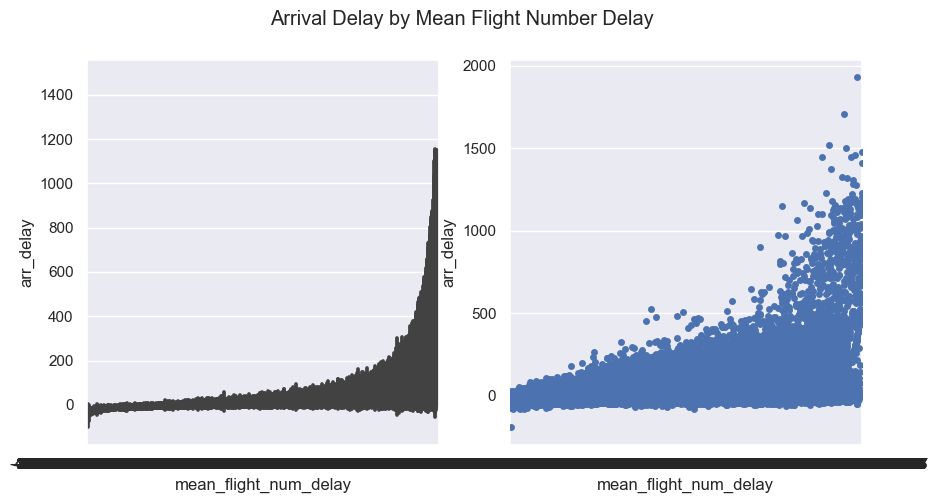

In [ ]:
# target_rel(df_flights_train, feature='mean_flight_num_delay', feature_title='Mean Flight Number Delay')

Text(0.5, 1.0, 'Arrival Delay by Mean Flight Number Delay')

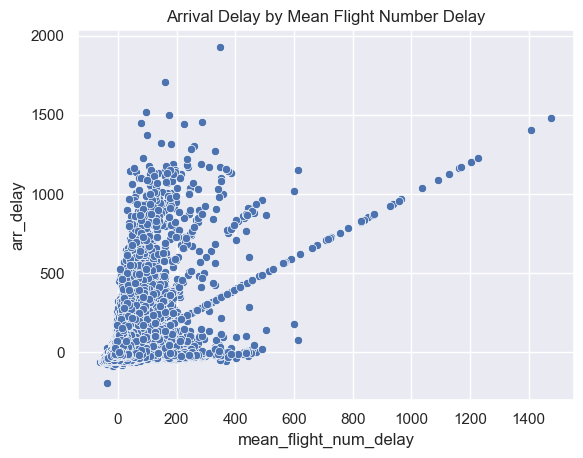

In [ ]:
g = sns.scatterplot(data=df_flights_test, x='mean_flight_num_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Flight Number Delay - TEST SET')

In [ ]:
df_flights_train['mean_flight_num_delay'].corr(df_flights_train['arr_delay'])

0.49554328298056727

In [ ]:
len(df_flights_train[df_flights_train['mean_flight_num_delay']==df_flights_train['arr_delay']])

21553

In [ ]:
unique_flights = (df_flights_train['op_unique_carrier'] + df_flights_train['op_carrier_fl_num'] + df_flights_train['crs_dep_time_of_day']).nunique()
unique_flights

76942

In [ ]:
one_flight_only = sum((df_flights_train['op_unique_carrier'] + df_flights_train['op_carrier_fl_num'] + df_flights_train['crs_dep_time_of_day']).value_counts()==1)
one_flight_only

20006

In [ ]:
percent_one_flight_only = 100*(one_flight_only/unique_flights)
percent_one_flight_only

26.001403654700944

In [ ]:
# make a pickle of the feature engineered training data
import pickle

feature_engineered_data5 = df_flights_train

with open(r'data\flight_data_engineered5.pickle','wb') as flight_data_file:
     pickle.dump(feature_engineered_data5, flight_data_file)